<a href="https://colab.research.google.com/github/okwasna/praca_inzynierska/blob/main/wersja_ostateczna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler


In [ ]:


file_path = 'summary_htseq_norm2.xlsx'
df = pd.read_excel(file_path, sheet_name='summary_htseq')

print(f"Liczba genów przed filtrowaniem: {len(df)}")

mean_before_filtering = df['var'].mean()
variance_before_filtering = df['var'].var()

print(f"Średnia wariancji przed filtrowaniem: {mean_before_filtering}")
print(f"Wariancja przed filtrowaniem: {variance_before_filtering}")

variance_threshold = 10

df_filtered = df[df['var'] >= variance_threshold]

mean_after_filtering = df_filtered['var'].mean()
variance_after_filtering = df_filtered['var'].var()

print(f"Średnia wariancji po filtrowaniu: {mean_after_filtering}")
print(f"Wariancja po filtrowaniu: {variance_after_filtering}")

initial_counts = df['lncRNA'].value_counts()

filtered_counts = df_filtered['lncRNA'].value_counts()

removed_counts = initial_counts - filtered_counts

removed_0 = removed_counts.get(0, 0)
removed_1 = removed_counts.get(1, 0)

print(f"Liczba genów usuniętych z lncRNA = 0: {removed_0}")
print(f"Liczba genów usuniętych z lncRNA = 1: {removed_1}")

total_genes_after_filtering = len(df_filtered)
print(f"Łączna liczba genów po filtrowaniu: {total_genes_after_filtering}")

Liczba genów przed filtrowaniem: 28677
Średnia wariancji przed filtrowaniem: 83837021.10925484
Wariancja przed filtrowaniem: 1.4257388777828288e+20
Średnia wariancji po filtrowaniu: 108068243.92073244
Wariancja po filtrowaniu: 1.837809291273408e+20
Liczba genów usuniętych z lncRNA = 0: 3473
Liczba genów usuniętych z lncRNA = 1: 2957
Łączna liczba genów po filtrowaniu: 22247


In [ ]:
print(f"Liczba próbek (kolumn) branych pod uwagę do klastrowania: {df_filtered.shape[1]}")
print(f"Liczba genów (wierszy) branych pod uwagę po wybraniu próbek do klastrowania: {df_filtered.shape[0]}")


Liczba próbek (kolumn) branych pod uwagę do klastrowania: 31
Liczba genów (wierszy) branych pod uwagę po wybraniu próbek do klastrowania: 22247


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
#to ostateczne co bedzie w kodzie bo ma ustalona wylaczona losowosc

data_values = df_filtered.loc[:, 'SRR7451446':]
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_values)

cluster_ranges = range(40, 65, 5)

for n_clusters in cluster_ranges:
    print(f"\nKMeans dla {n_clusters} klastrów:")

    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=50)
    kmeans.fit(data_normalized)


    df_filtered[f'Cluster_{n_clusters}'] = kmeans.labels_


    silhouette_avg = silhouette_score(data_normalized, kmeans.labels_)
    print(f"Średni wskaźnik Silhouette dla {n_clusters} klastrów: {silhouette_avg:.4f}")


    silhouette_values = silhouette_samples(data_normalized, kmeans.labels_)
    df_filtered['Silhouette'] = silhouette_values


    cluster_silhouette_means = df_filtered.groupby(f'Cluster_{n_clusters}')['Silhouette'].mean()
    print(f"Średni wskaźnik Silhouette dla każdego klastra:\n{cluster_silhouette_means}")


    cluster_counts = df_filtered[f'Cluster_{n_clusters}'].value_counts()
    print(f"Ilość genów w każdym klastrze dla {n_clusters} klastrów:\n{cluster_counts}")

print(f"Całkowita liczba genów przypisanych do klastrów: {len(df_filtered)}")



KMeans dla 40 klastrów:


<ipython-input-13-c1c4a4bd8f53>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Cluster_{n_clusters}'] = kmeans.labels_


Średni wskaźnik Silhouette dla 40 klastrów: 0.6502


<ipython-input-13-c1c4a4bd8f53>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Silhouette'] = silhouette_values


Średni wskaźnik Silhouette dla każdego klastra:
Cluster_40
0     0.400223
1     0.000000
2     0.946969
3     0.401088
4     0.176956
5     0.555360
6     0.174815
7     0.201248
8     0.093739
9     0.304115
10    0.000000
11    0.336214
12    0.319622
13    0.209526
14    0.446716
15    0.166725
16    0.405086
17    0.193447
18    0.795287
19    0.790344
20    0.371626
21    0.000000
22    0.407924
23    0.475825
24    0.884501
25    0.000000
26    0.722798
27    0.000000
28    0.876583
29    0.315608
30    0.110915
31    0.838228
32    0.000000
33    0.109683
34    0.614803
35    0.401026
36    0.617495
37    0.000000
38    0.848729
39    0.629079
Name: Silhouette, dtype: float64
Ilość genów w każdym klastrze dla 40 klastrów:
Cluster_40
2     8089
5     1319
39     946
29     895
13     879
16     767
0      665
24     662
15     647
12     588
23     537
9      529
18     501
36     488
28     481
22     456
14     439
20     410
6      407
19     381
3      336
34     332
7      3

<ipython-input-13-c1c4a4bd8f53>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Cluster_{n_clusters}'] = kmeans.labels_


Średni wskaźnik Silhouette dla 45 klastrów: 0.6690


<ipython-input-13-c1c4a4bd8f53>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Silhouette'] = silhouette_values


Średni wskaźnik Silhouette dla każdego klastra:
Cluster_45
0     0.946735
1     0.000000
2     0.486950
3     0.118506
4     0.621700
5     0.338901
6     0.355612
7     0.135466
8     0.000000
9     0.627927
10    0.788459
11    0.515093
12    0.275257
13    0.420517
14    0.554178
15    0.459621
16    0.000000
17    0.789667
18    0.467566
19    0.183914
20    0.876072
21    0.615445
22    0.470254
23    0.000000
24    0.000000
25    0.882908
26    0.366280
27    0.000000
28    0.728969
29    0.000000
30    0.375819
31    0.314608
32    0.000000
33    0.339381
34    0.000000
35    0.392424
36    0.837935
37    0.226581
38    0.812175
39    0.157082
40    0.554344
41    0.846919
42    0.401127
43    0.429143
44    0.208256
Name: Silhouette, dtype: float64
Ilość genów w każdym klastrze dla 45 klastrów:
Cluster_45
0     8089
14    1320
9      947
5      811
12     711
25     662
2      657
6      616
37     565
15     540
10     500
21     488
33     486
20     481
35     469
13     426

<ipython-input-13-c1c4a4bd8f53>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Cluster_{n_clusters}'] = kmeans.labels_


Średni wskaźnik Silhouette dla 50 klastrów: 0.6797


<ipython-input-13-c1c4a4bd8f53>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Silhouette'] = silhouette_values


Średni wskaźnik Silhouette dla każdego klastra:
Cluster_50
0     0.954949
1     0.000000
2     0.405816
3     0.000000
4     0.808009
5     0.436170
6     0.377675
7     0.000000
8     0.076734
9     0.321396
10    0.224214
11    0.787300
12    0.789241
13    0.877514
14    0.464865
15    0.000000
16    0.148148
17    0.000000
18    0.327209
19    0.615238
20    0.399671
21    0.280592
22    0.537550
23    0.464986
24    0.163180
25    0.000000
26    0.875725
27    0.708416
28    0.000000
29    0.206580
30    0.462920
31    0.363125
32    0.000000
33    0.000000
34    0.296669
35    0.604413
36    0.598503
37    0.000000
38    0.705065
39    0.313111
40    0.538457
41    0.456057
42    0.399453
43    0.837949
44    0.000000
45    0.212786
46    0.018920
47    0.848546
48    0.515188
49    0.812064
Name: Silhouette, dtype: float64
Ilość genów w każdym klastrze dla 50 klastrów:
Cluster_50
0     7844
35     947
4      810
2      766
21     705
13     662
14     659
6      596
10     564
5

<ipython-input-13-c1c4a4bd8f53>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Cluster_{n_clusters}'] = kmeans.labels_


Średni wskaźnik Silhouette dla 55 klastrów: 0.6892


<ipython-input-13-c1c4a4bd8f53>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Silhouette'] = silhouette_values


Średni wskaźnik Silhouette dla każdego klastra:
Cluster_55
0     0.523828
1     0.535763
2     0.000000
3     0.610122
4     0.000000
5     0.665384
6     0.083596
7     0.000000
8     0.406057
9     0.429287
10    0.761186
11    0.762055
12    0.000000
13    0.809534
14    0.149465
15    0.873218
16    0.312987
17    0.286423
18    0.690540
19    0.823250
20    0.884030
21    0.592873
22    0.661156
23    0.000000
24    0.000000
25    0.062573
26    0.000000
27    0.954949
28    0.000000
29    0.482445
30    0.186927
31    0.000000
32    0.848135
33    0.388670
34    0.000000
35    0.434117
36    0.148148
37    0.470364
38    0.321396
39    0.426175
40    0.393886
41    0.573570
42    0.513592
43    0.257481
44    0.371087
45    0.457629
46    0.447163
47    0.340610
48    0.000000
49    0.509482
50    0.704215
51    0.554511
52    0.791859
53    0.309648
54    0.000000
Name: Silhouette, dtype: float64
Ilość genów w każdym klastrze dla 55 klastrów:
Cluster_55
27    7844
3      939
19 

<ipython-input-13-c1c4a4bd8f53>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Cluster_{n_clusters}'] = kmeans.labels_


Średni wskaźnik Silhouette dla 60 klastrów: 0.6990
Średni wskaźnik Silhouette dla każdego klastra:
Cluster_60
0     0.954949
1     0.000000
2     0.825473
3     0.334201
4     0.000000
5     0.553701
6     0.000000
7     0.166871
8     0.291137
9     0.788952
10    0.599640
11    0.000000
12    0.664610
13    0.395588
14    0.523836
15    0.000000
16    0.409057
17    0.450148
18    0.501738
19    0.606103
20    0.761783
21    0.873151
22    0.000000
23    0.604806
24    0.000000
25    0.265870
26    0.299418
27    0.000000
28    0.000000
29    0.217029
30    0.592949
31    0.687130
32    0.829396
33    0.264457
34    0.425540
35    0.387867
36    0.884030
37    0.194922
38    0.321396
39    0.642853
40    0.573341
41    0.000000
42    0.188197
43    0.428842
44    0.000000
45    0.846757
46    0.704106
47    0.809991
48    0.179737
49    0.761010
50    0.791859
51    0.822218
52    0.455830
53    0.000000
54    0.115683
55   -0.024526
56    0.524319
57    0.471279
58    0.535763
59   

<ipython-input-13-c1c4a4bd8f53>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Silhouette'] = silhouette_values


In [ ]:
import pandas as pd

# tabela z wyniki sillhoute
results = []


cluster_ranges = range(40, 65, 5)

for n_clusters in cluster_ranges:
    silhouette_avg = silhouette_score(data_normalized, df_filtered[f'Cluster_{n_clusters}'])

    cluster_silhouettes = df_filtered.groupby(f'Cluster_{n_clusters}')['Silhouette'].mean().to_dict()

    record = {'Liczba klastrów': n_clusters, 'Średni Silhouette': round(silhouette_avg, 4)}
    record.update({f'Klaster {k}': round(v, 4) for k, v in cluster_silhouettes.items()})
    results.append(record)

silhouette_summary = pd.DataFrame(results)

print(silhouette_summary)
#dokonczyc

   Liczba klastrów  Średni Silhouette  Klaster 0  Klaster 1  Klaster 2  \
0               40             0.6502     0.4657     0.0000     0.9423   
1               45             0.6690     0.9423     0.0000     0.4970   
2               50             0.6797     0.9549     0.0000     0.4596   
3               55             0.6892     0.5238     0.5358     0.0000   
4               60             0.6990     0.9549     0.0000     0.8255   

   Klaster 3  Klaster 4  Klaster 5  Klaster 6  Klaster 7  ...  Klaster 50  \
0     0.6410     0.0000     0.7727     0.3985     0.2739  ...         NaN   
1     0.0000     0.6354     0.4764     0.3280     0.1204  ...         NaN   
2     0.0000     0.8171     0.5985     0.3366     0.0000  ...         NaN   
3     0.6060     0.0000     0.6646     0.1204     0.0000  ...      0.7041   
4     0.3342     0.0000     0.5537     0.0000     0.1669  ...      0.7919   

   Klaster 51  Klaster 52  Klaster 53  Klaster 54  Klaster 55  Klaster 56  \
0         NaN  

In [ ]:
from google.colab import files

# Zapisanie istniejących wyników klastrowania do pliku CSV
output_path = 'kmeans_40_clusters.csv'
df_filtered[['Unnamed: 0', 'Cluster_40']].to_csv(output_path, index=False)

# Pobranie pliku na lokalny komputer
files.download(output_path)

print(f"Wyniki klastrowania zapisano do pliku: {output_path}")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Wyniki klastrowania zapisano do pliku: kmeans_40_clusters.csv


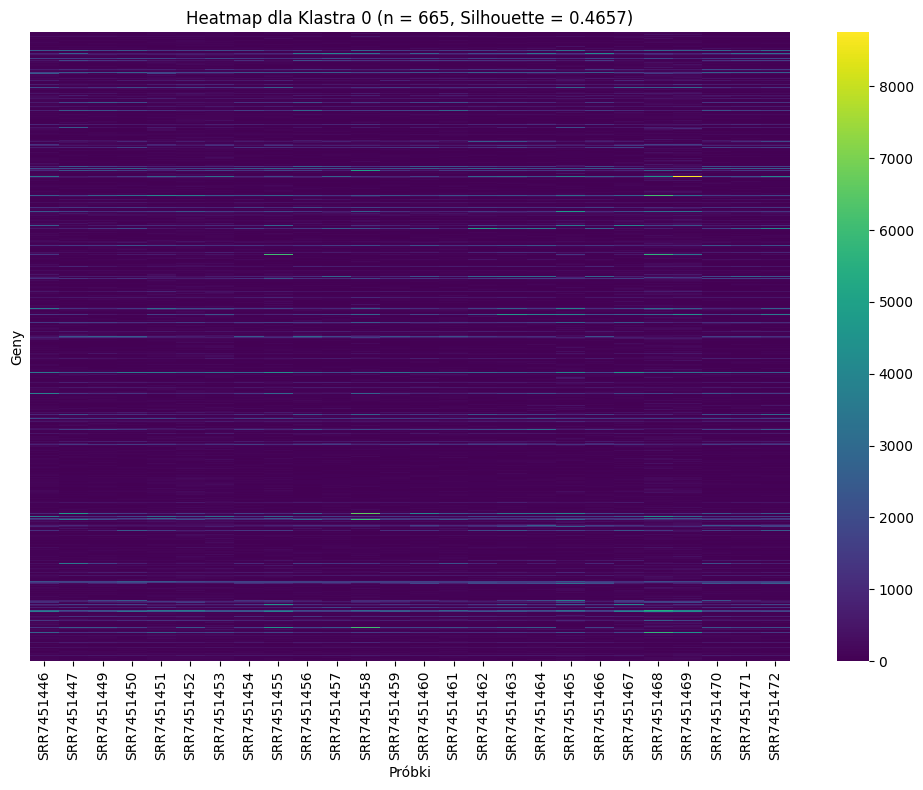

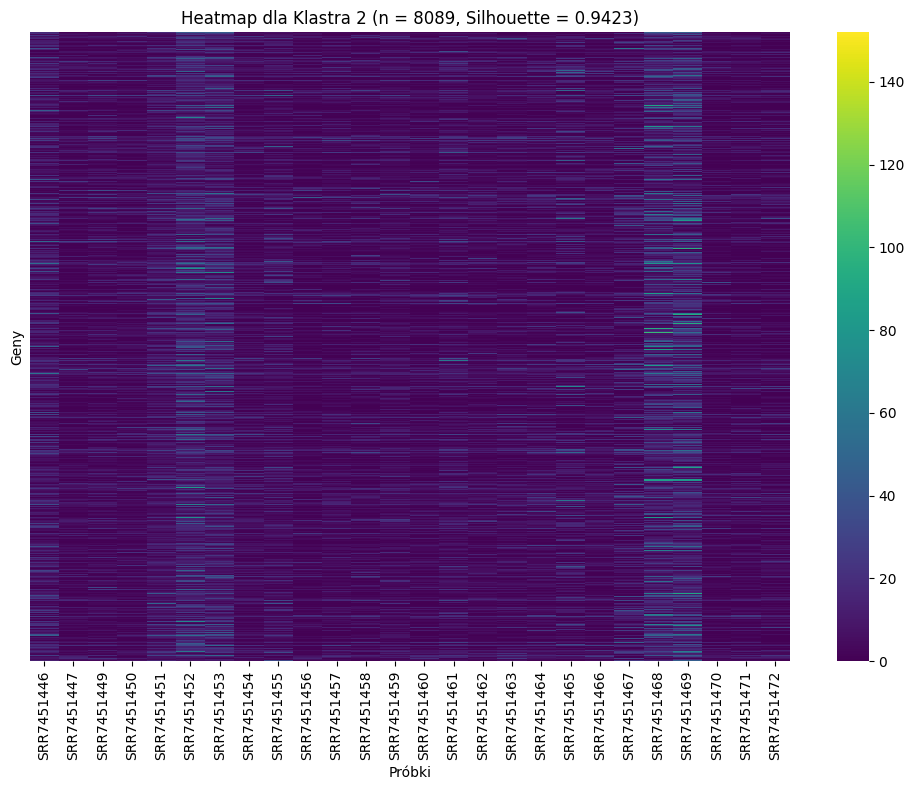

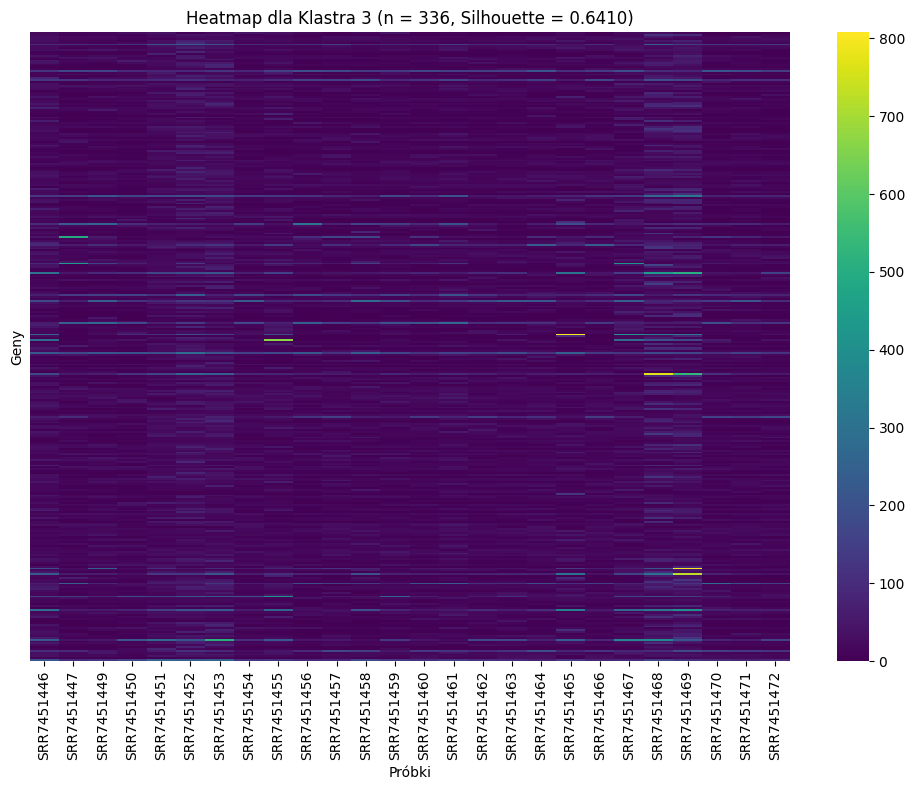

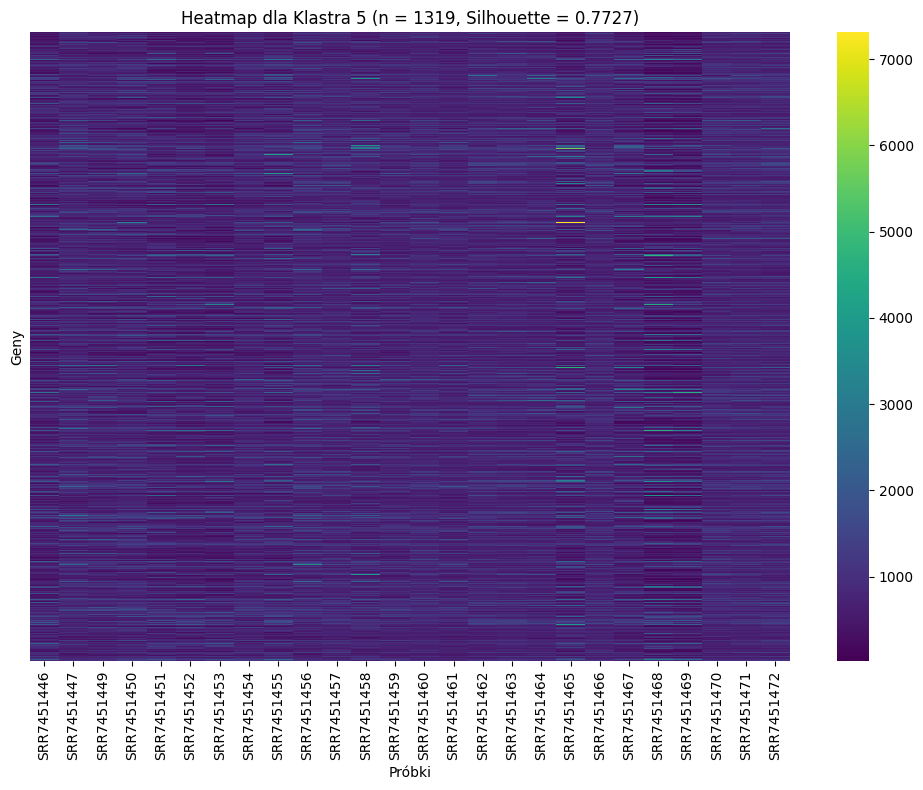

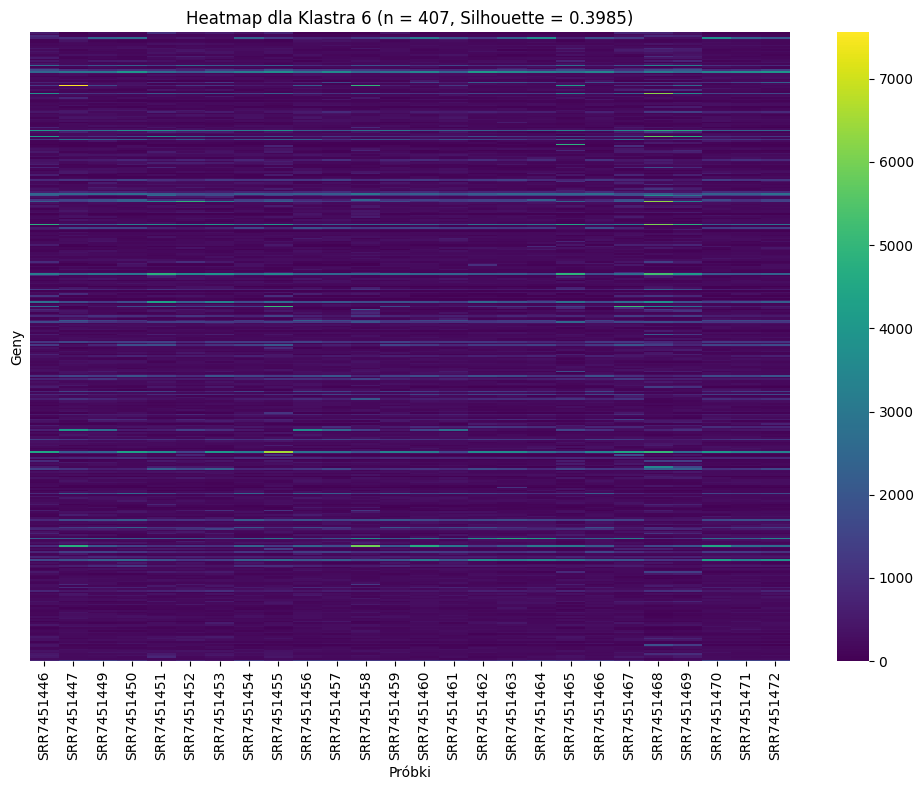

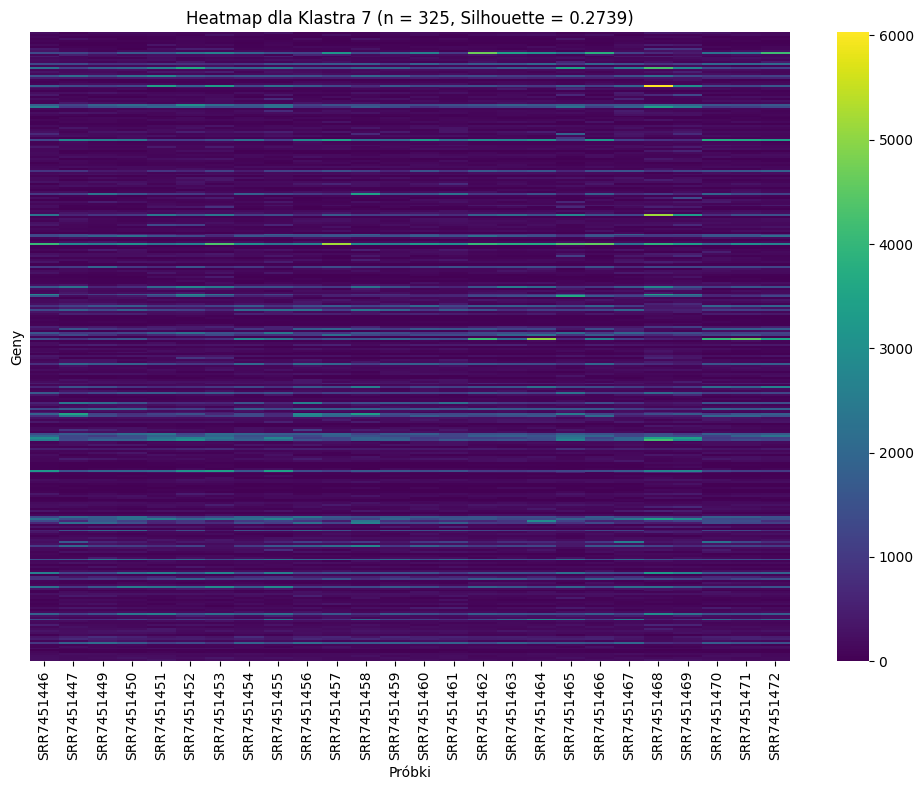

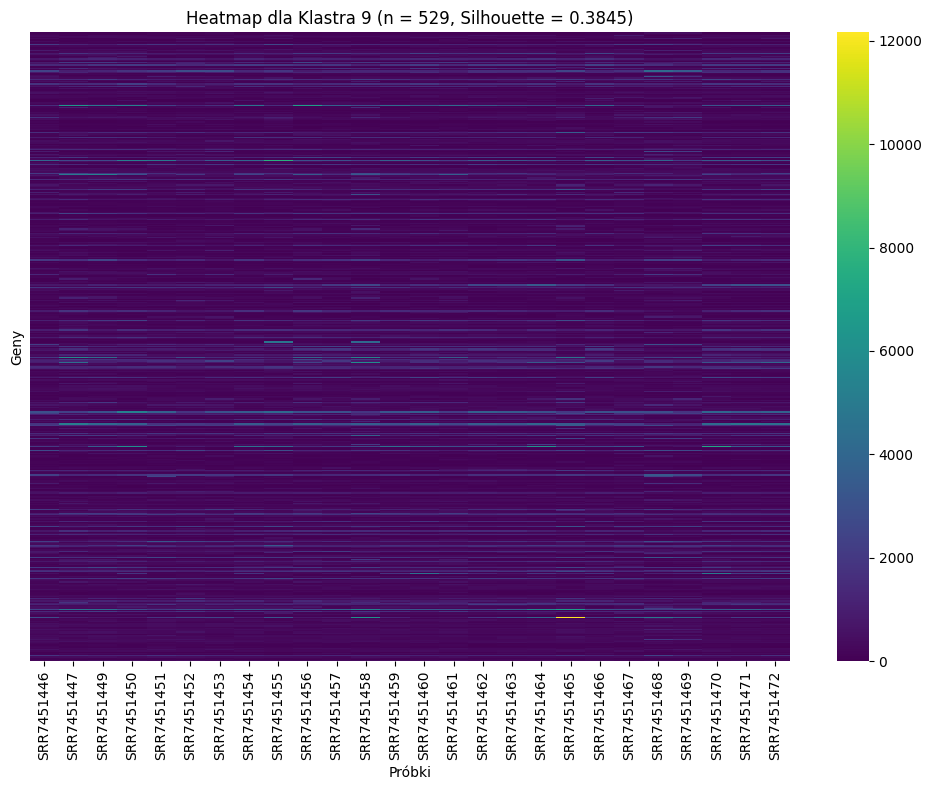

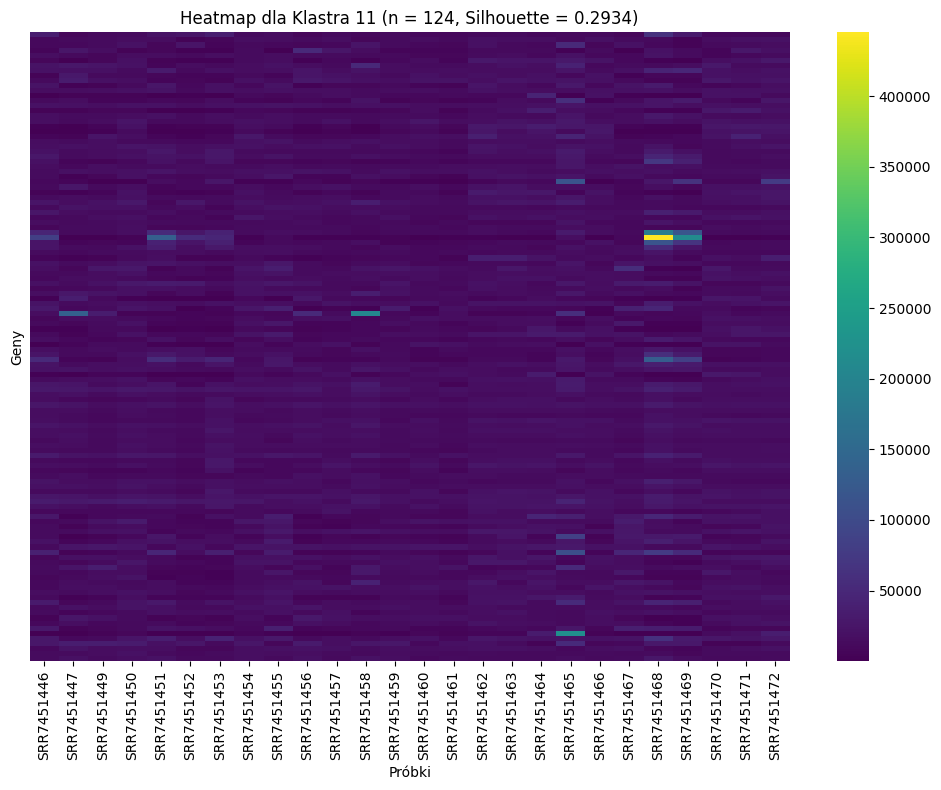

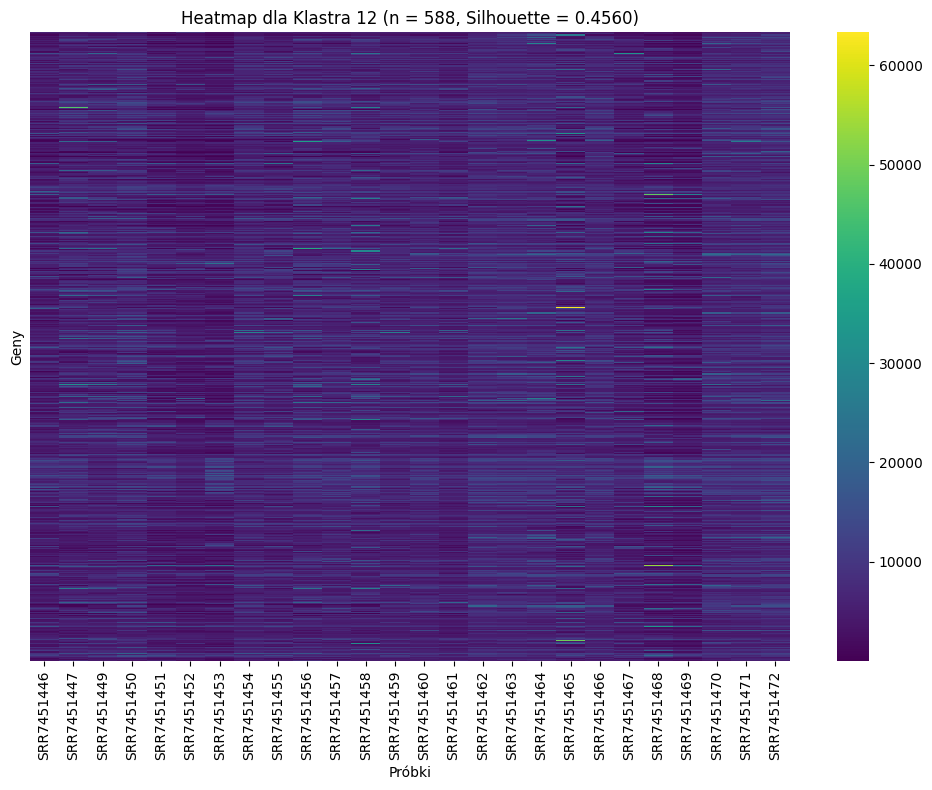

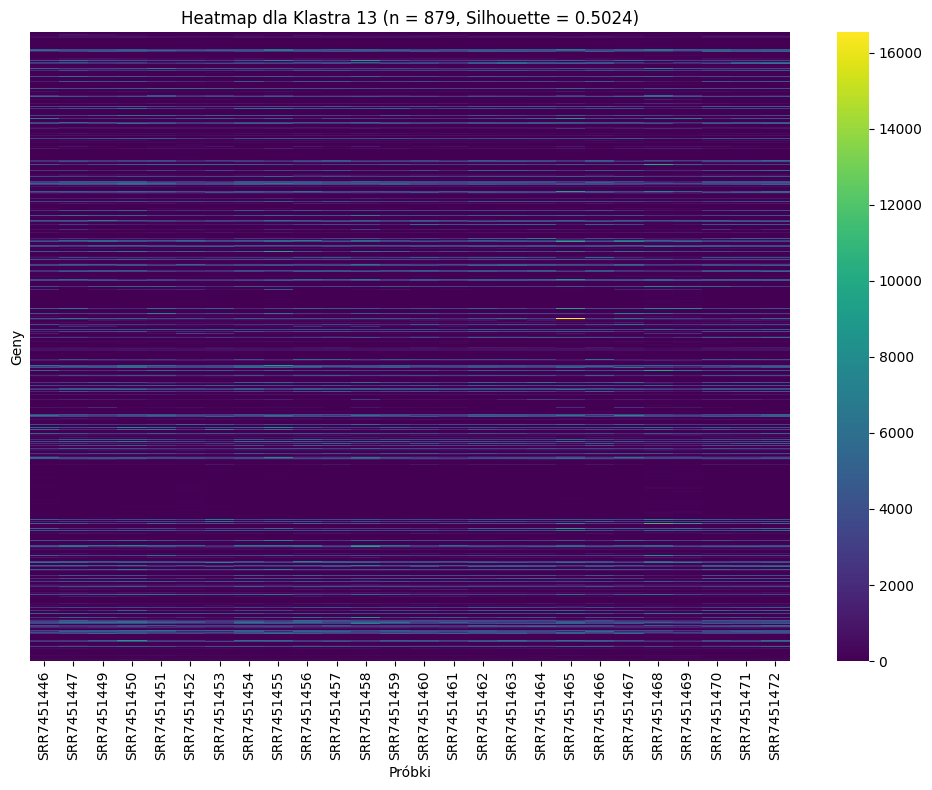

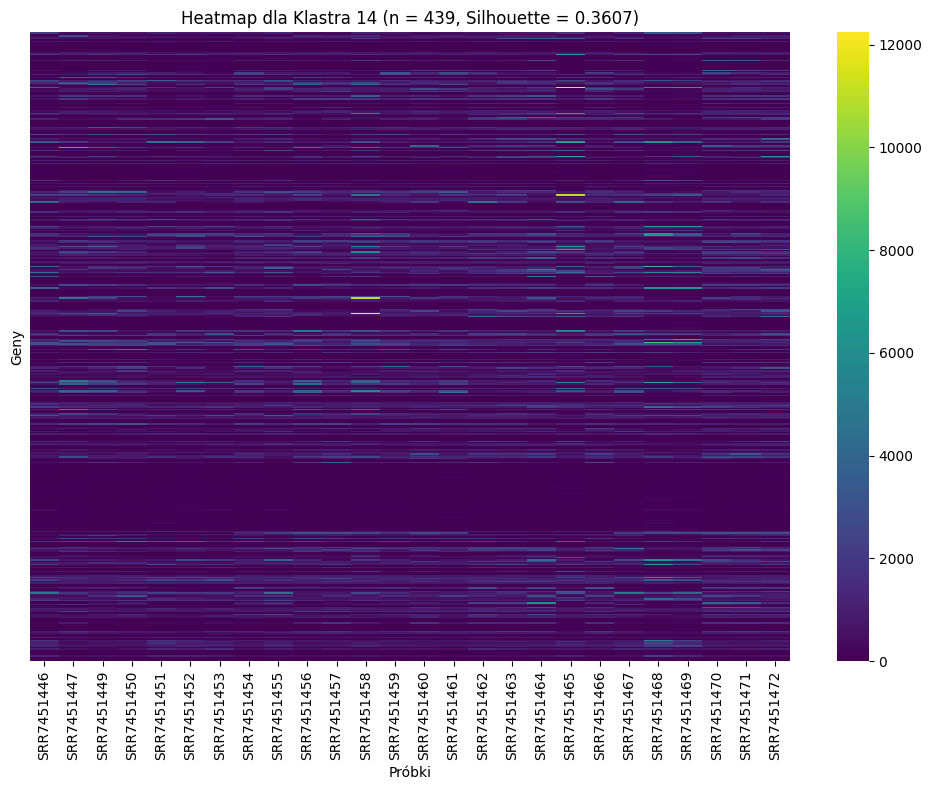

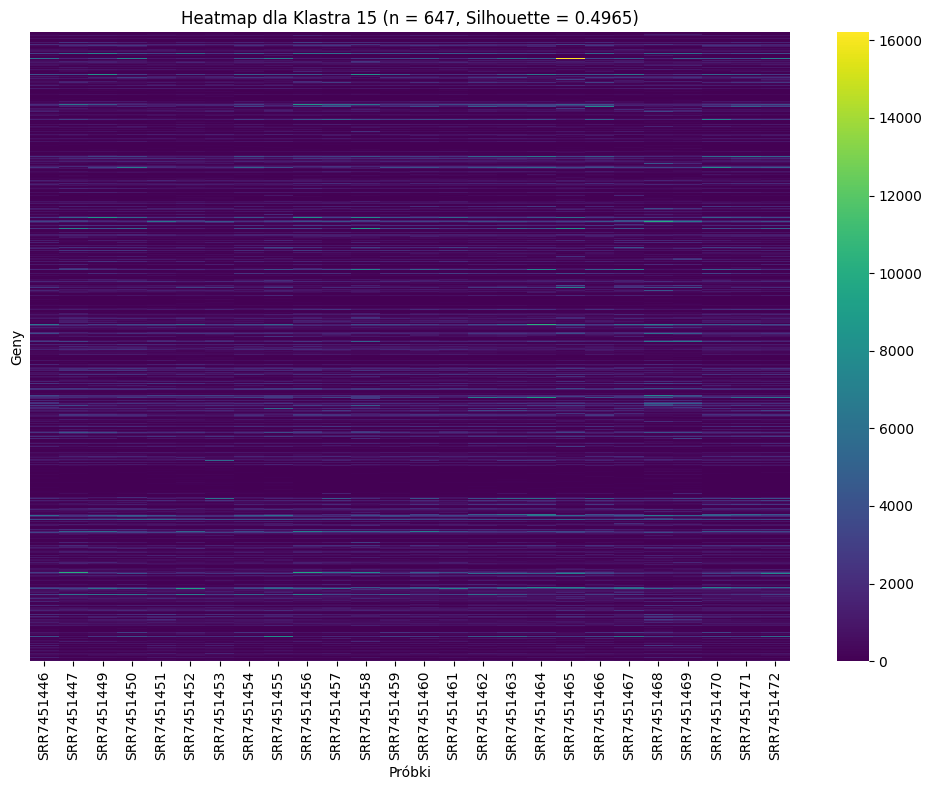

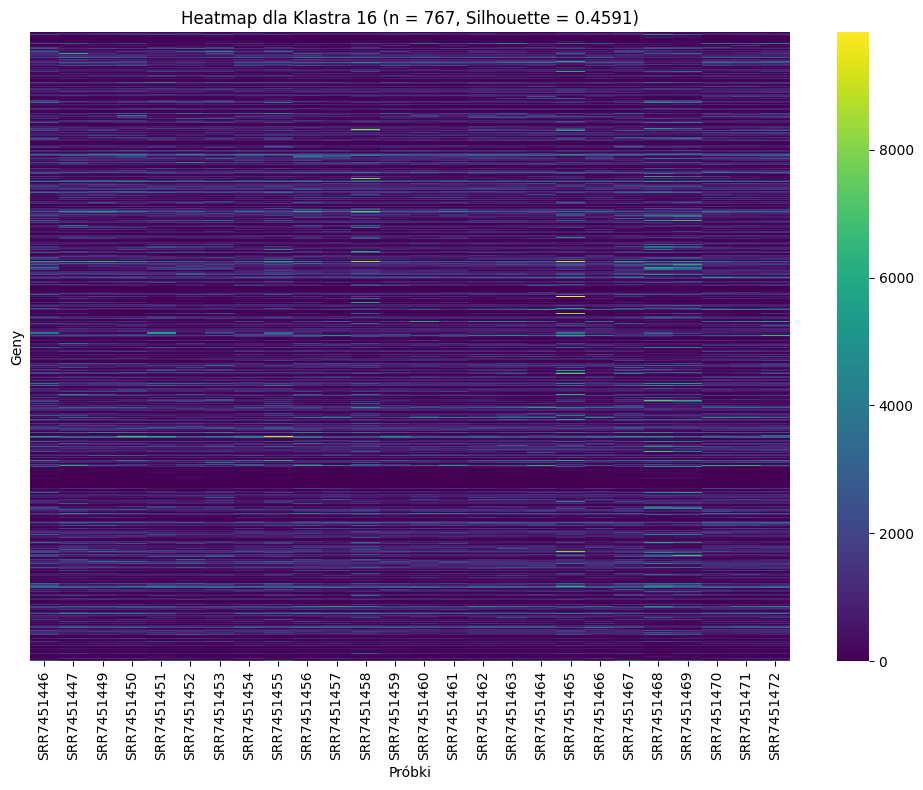

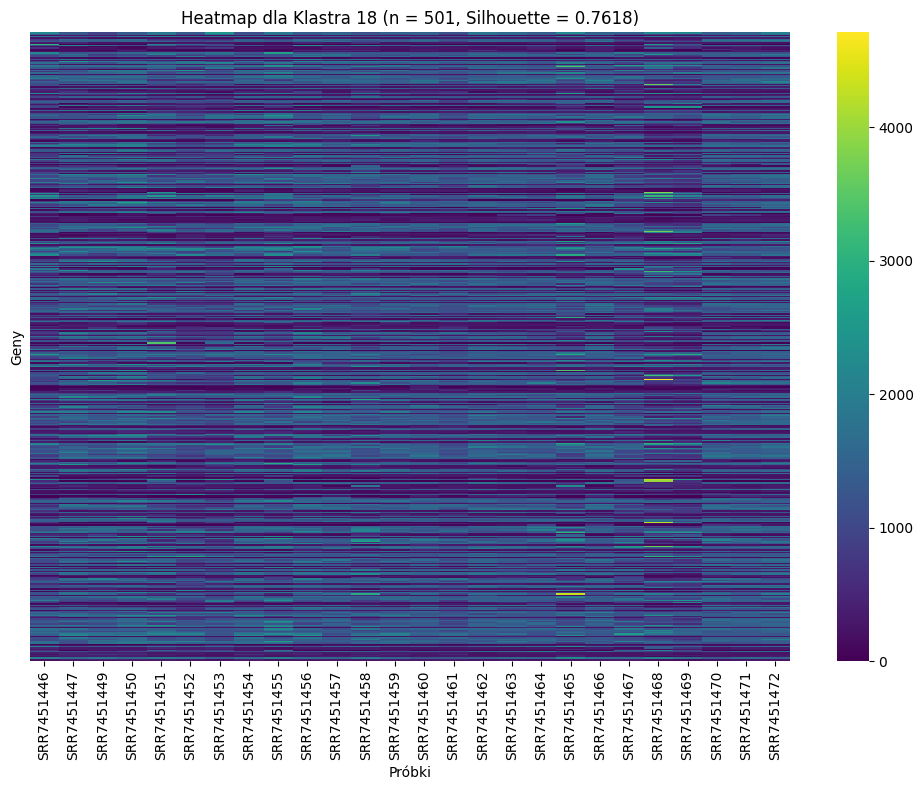

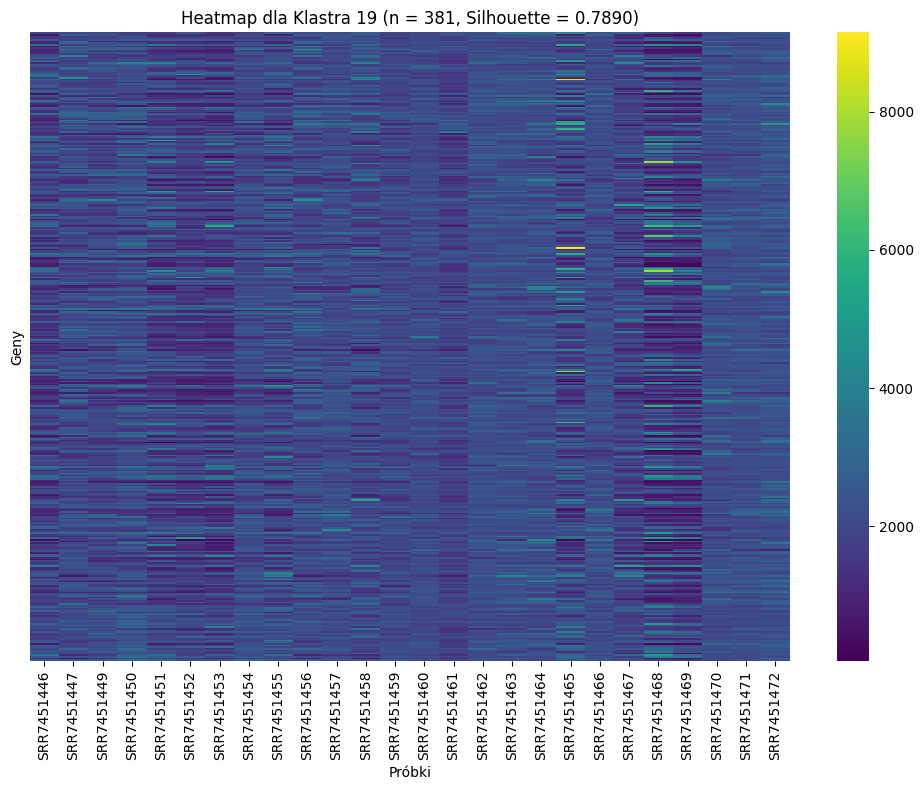

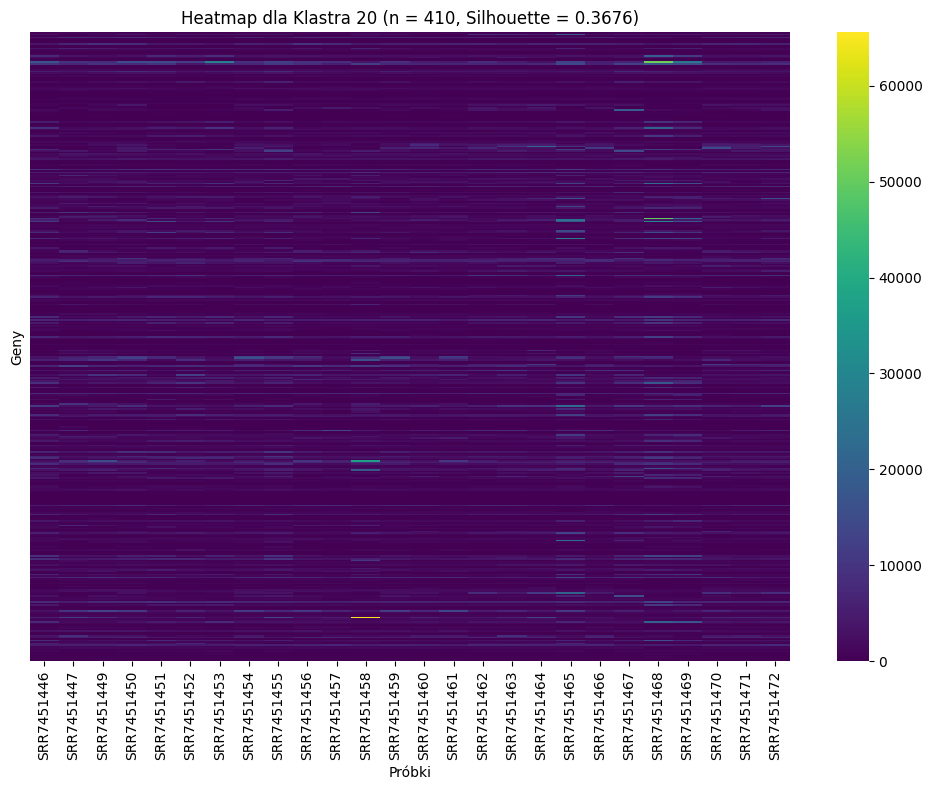

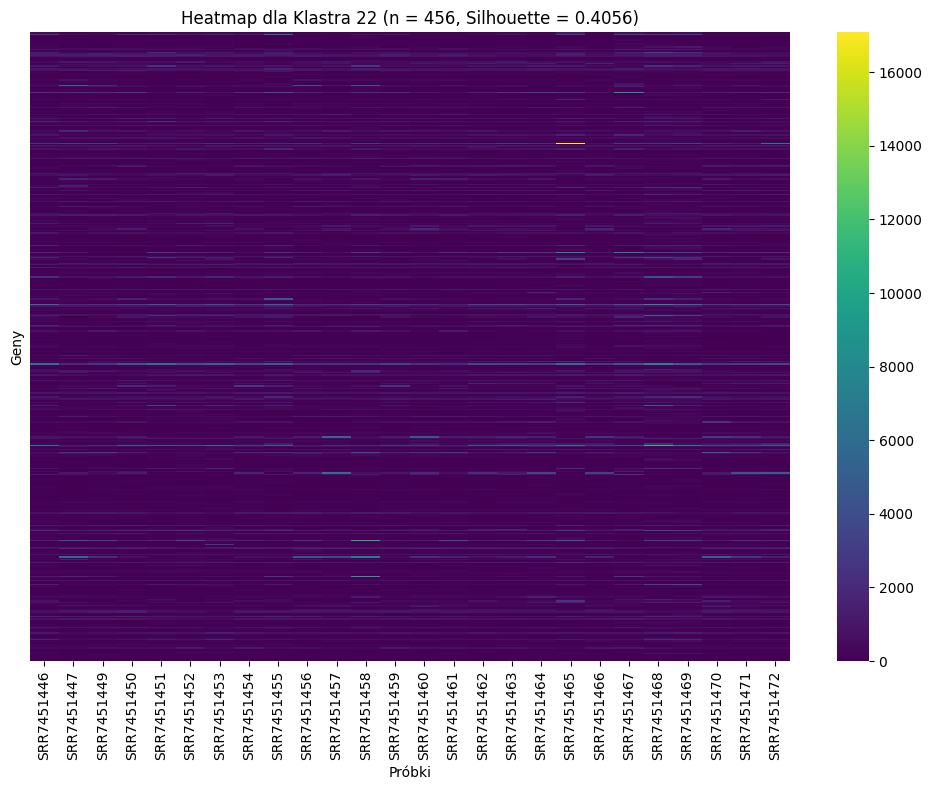

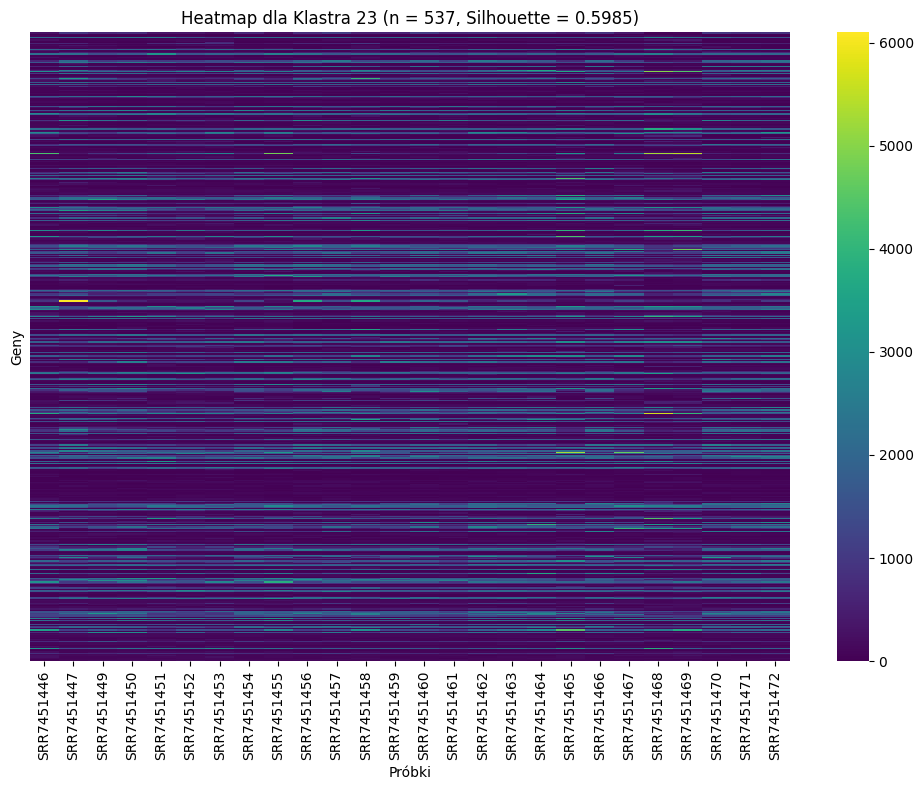

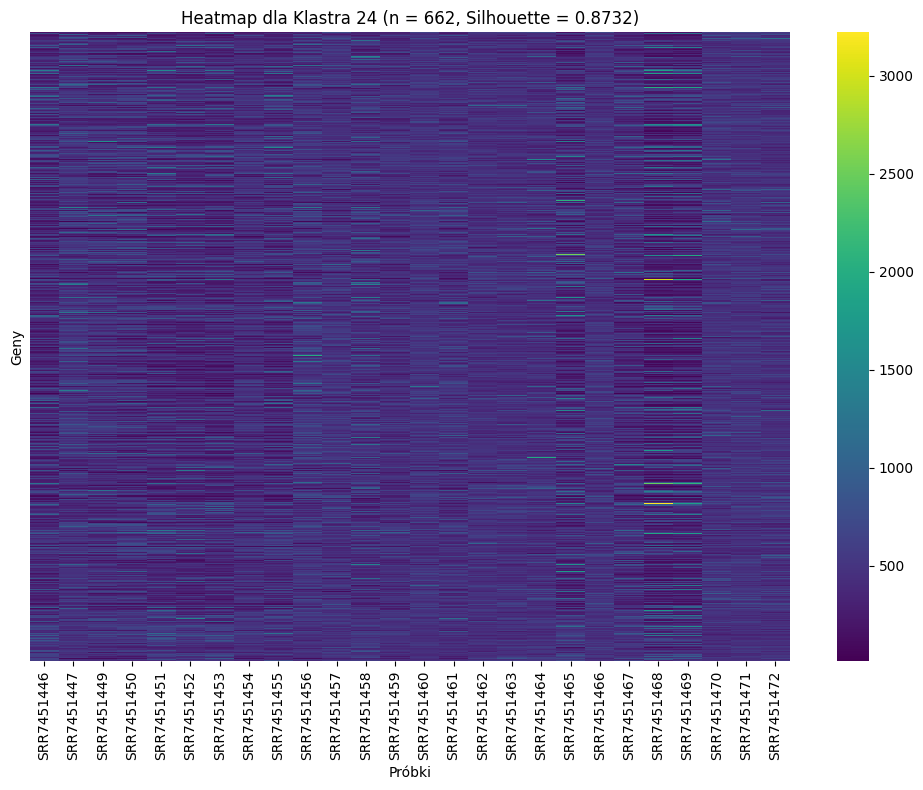

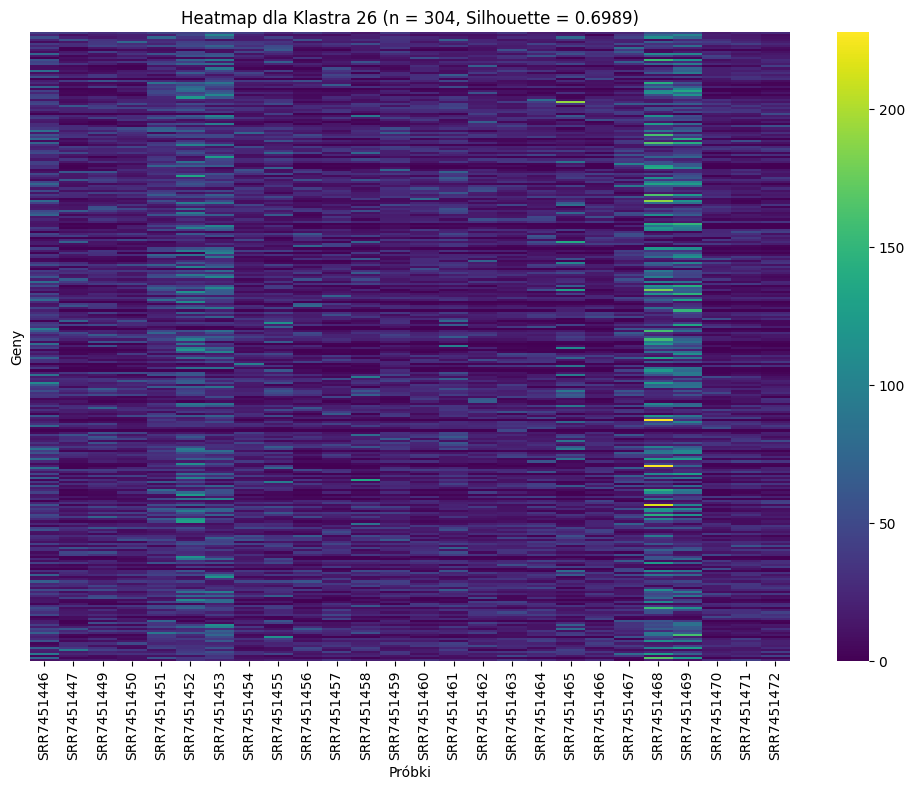

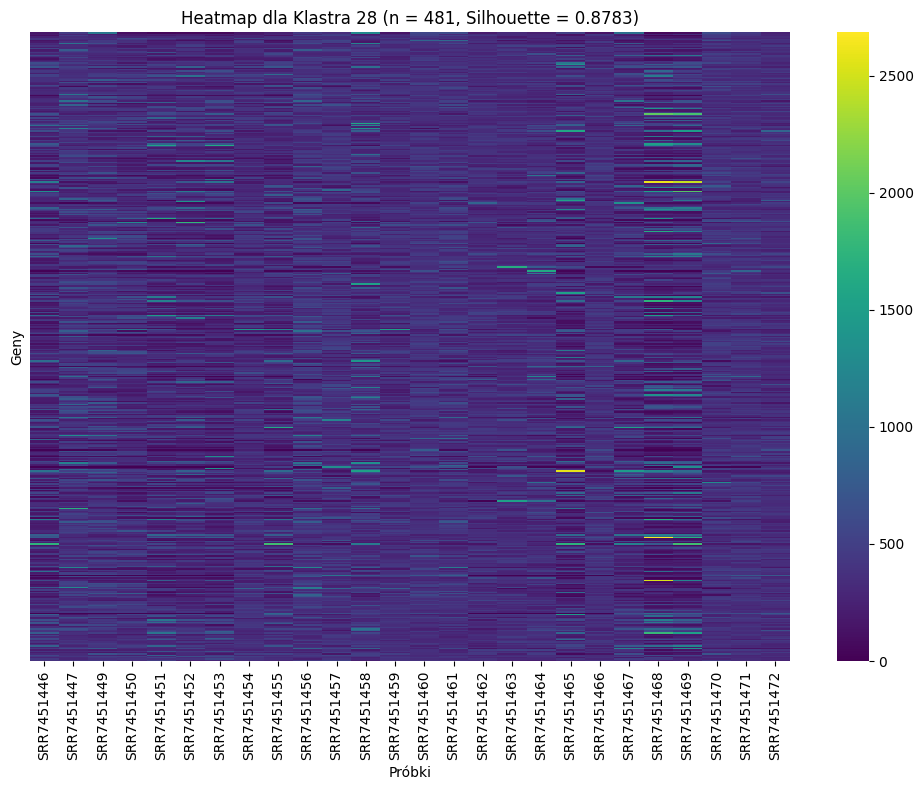

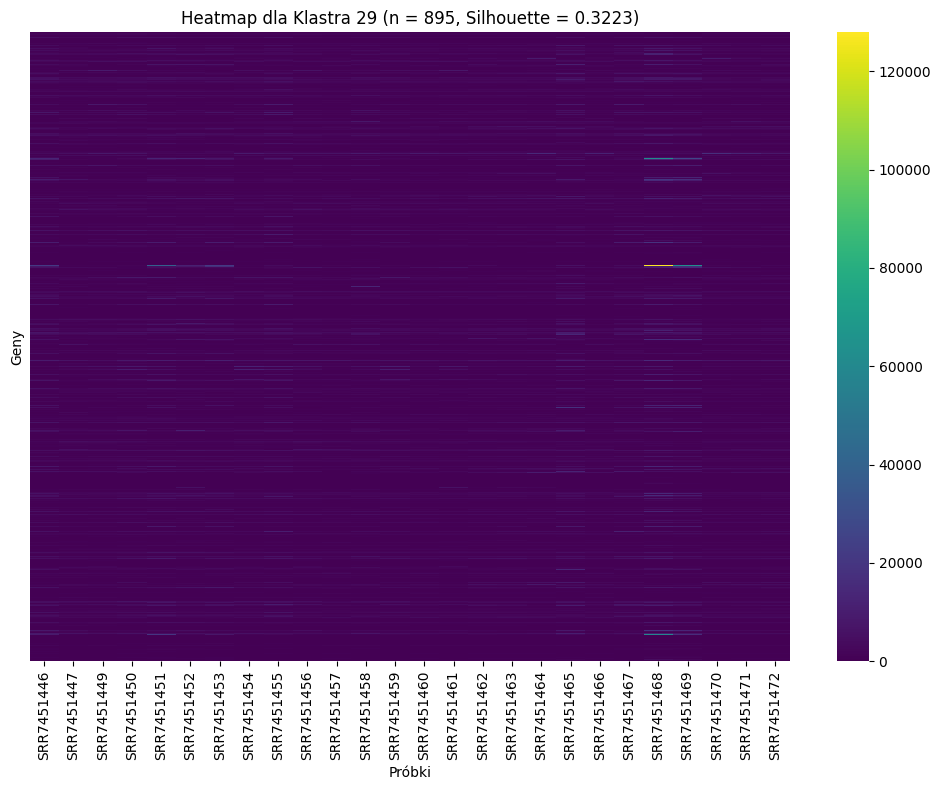

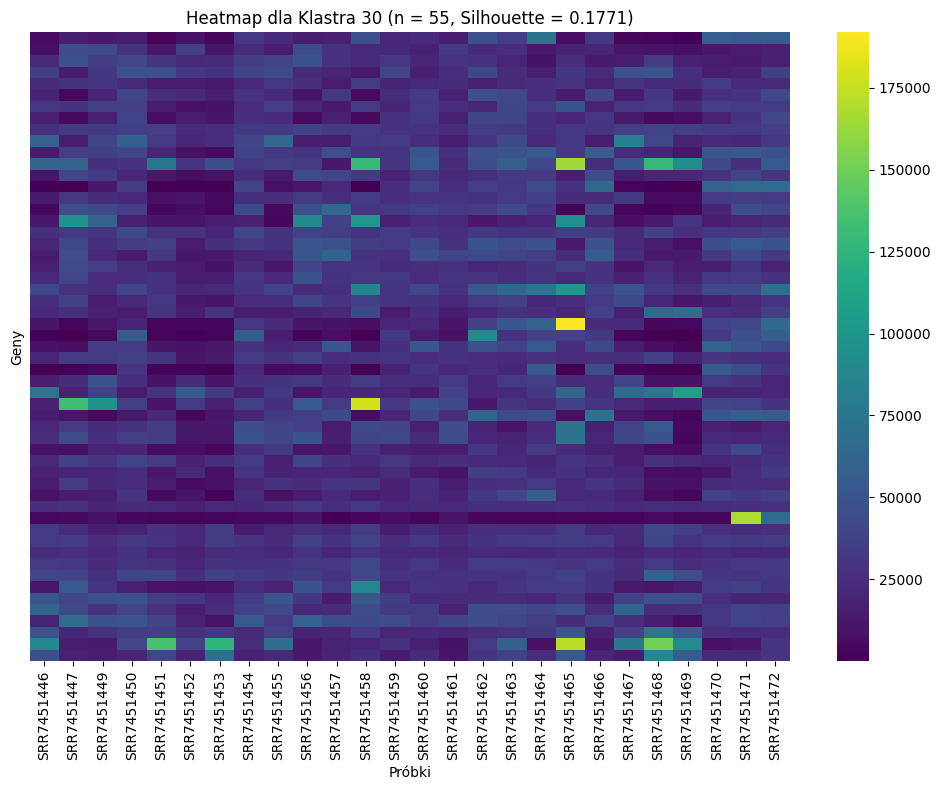

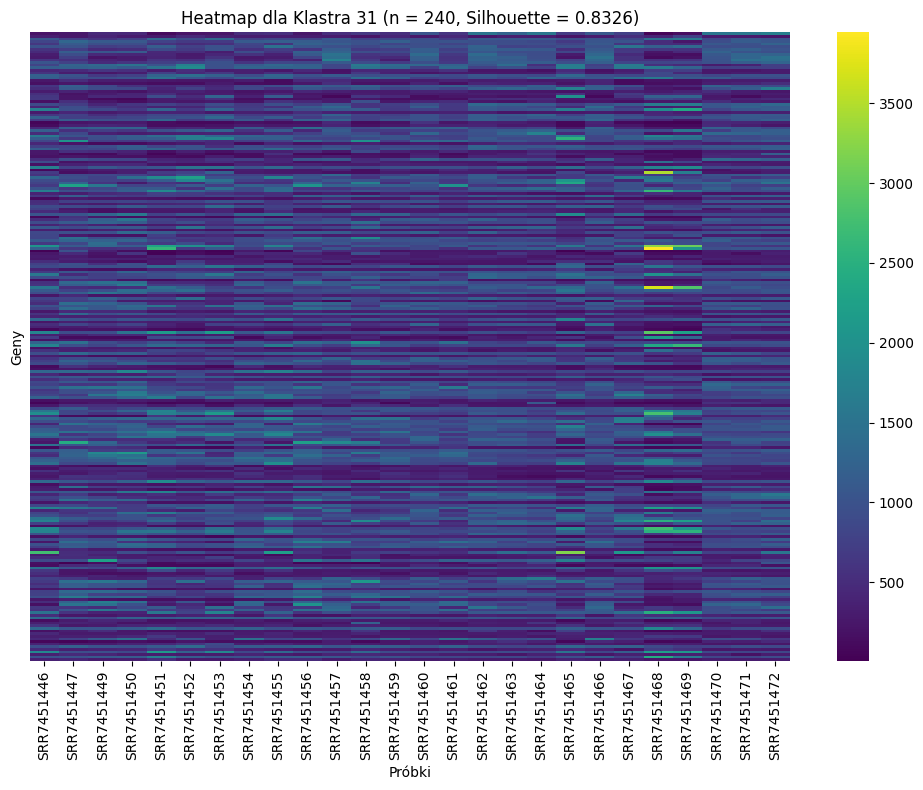

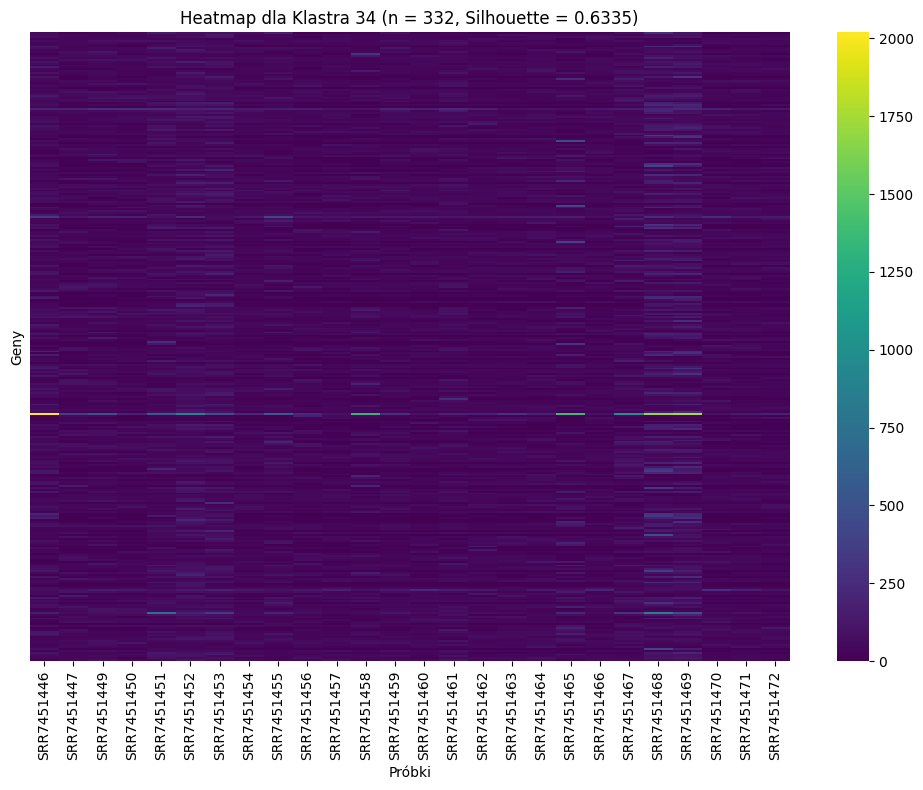

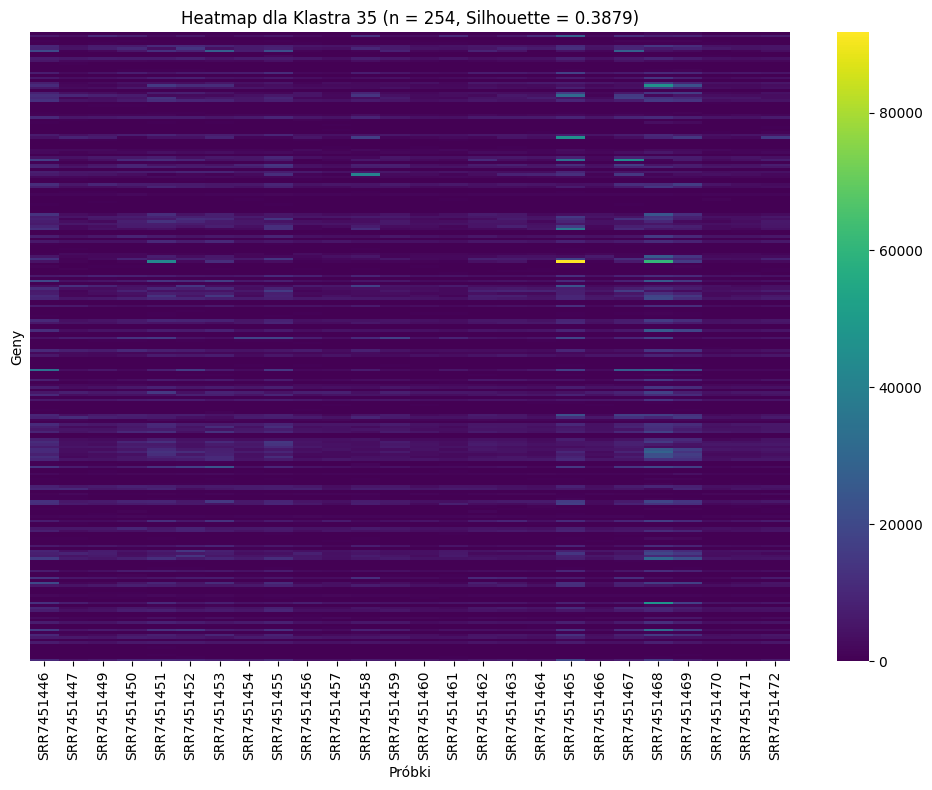

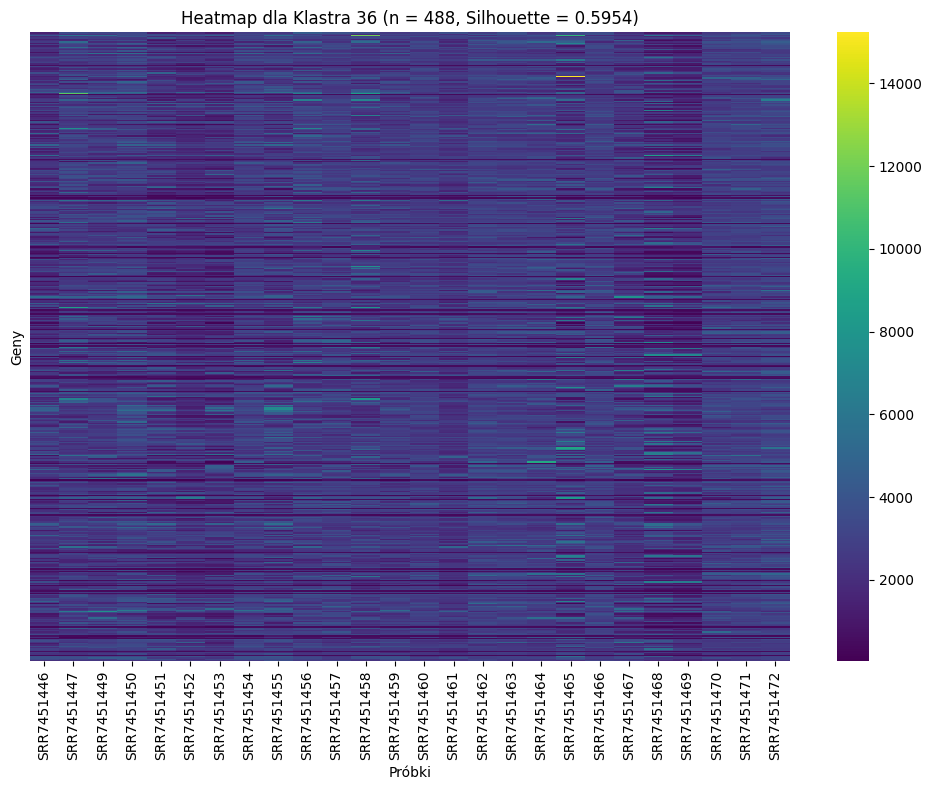

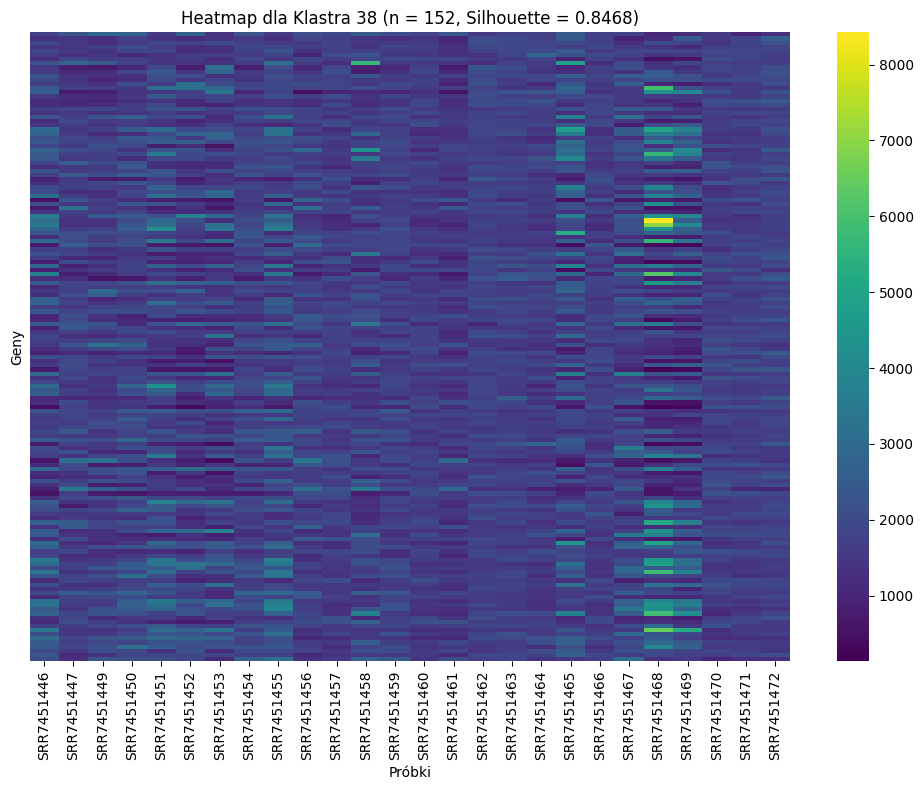

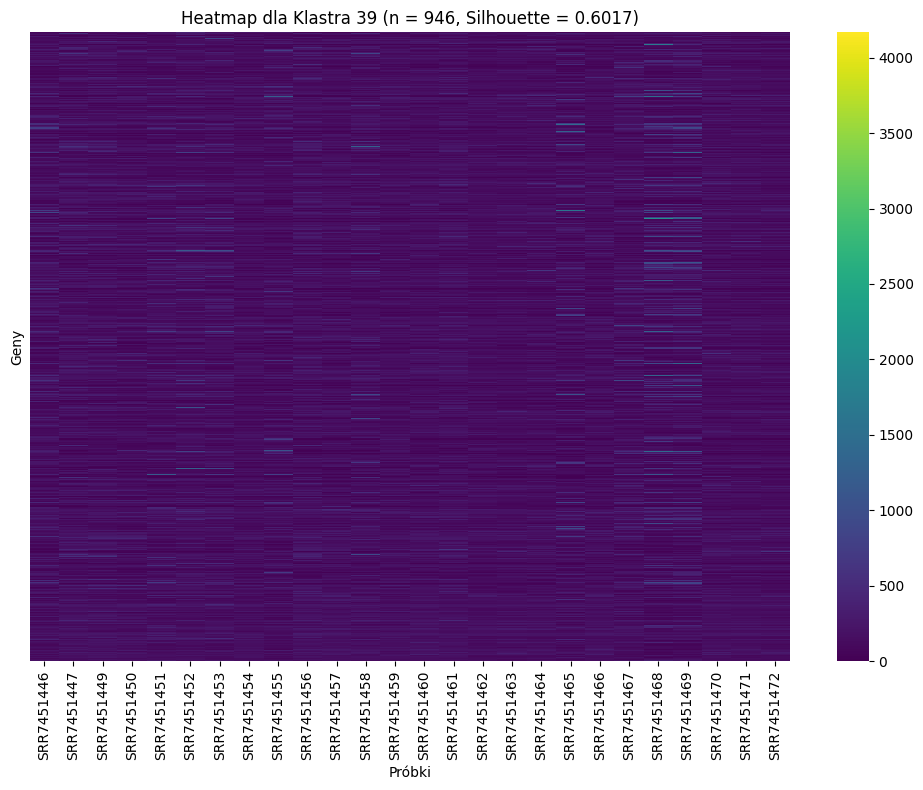

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


n_clusters_to_visualize = 40
min_genes = 50


for cluster_id in range(n_clusters_to_visualize):
    cluster_genes = df_filtered[df_filtered[f'Cluster_{n_clusters_to_visualize}'] == cluster_id]

    if len(cluster_genes) > min_genes:
        heatmap_data = cluster_genes.loc[:, 'SRR7451446':'SRR7451472']
        cluster_silhouette_mean = cluster_genes['Silhouette'].mean()

        plt.figure(figsize=(10, 8))
        sns.heatmap(heatmap_data, cmap="viridis", cbar=True, yticklabels=False)

        plt.title(f"Heatmap dla Klastra {cluster_id} (n = {len(cluster_genes)}, Silhouette = {cluster_silhouette_mean:.4f})")
        plt.xlabel("Próbki")
        plt.ylabel("Geny")
        plt.tight_layout()
        plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

agg_clustering_50 = AgglomerativeClustering(n_clusters=50)
agg_labels_50 = agg_clustering_50.fit_predict(data_normalized)

df_filtered.loc[:, 'Agg_Cluster_50'] = agg_labels_50

agg_silhouette_avg_50 = silhouette_score(data_normalized, agg_labels_50)
print(f"Średni wskaźnik Silhouette dla Agglomerative Clustering (50 klastrów): {agg_silhouette_avg_50:.4f}")

agg_cluster_counts_50 = pd.Series(agg_labels_50).value_counts()
print(f"Ilość genów w każdym klastrze dla Agglomerative Clustering (50 klastrów):")
print(agg_cluster_counts_50)


agg_silhouette_values_50 = silhouette_samples(data_normalized, agg_labels_50)
agg_cluster_silhouettes_50 = pd.DataFrame({
    'Cluster': agg_labels_50,
    'Silhouette': agg_silhouette_values_50
}).groupby('Cluster')['Silhouette'].mean()

print("Średni wskaźnik Silhouette dla każdego klastra w Agglomerative Clustering (50 klastrów):")
print(agg_cluster_silhouettes_50)

Średni wskaźnik Silhouette dla Agglomerative Clustering (50 klastrów): 0.6701
Ilość genów w każdym klastrze dla Agglomerative Clustering (50 klastrów):
21    7880
4     1336
8      934
7      697
9      666
26     658
15     585
1      549
6      539
41     523
29     490
14     488
28     485
25     444
3      428
13     426
44     390
37     381
32     353
18     350
19     311
23     299
27     283
45     261
20     253
16     246
42     244
39     222
43     209
46     199
5      196
40     157
33     153
22     150
38     129
11     127
24     110
12      51
10      24
0       10
2        2
47       1
49       1
35       1
31       1
36       1
34       1
48       1
17       1
30       1
Name: count, dtype: int64
Średni wskaźnik Silhouette dla każdego klastra w Agglomerative Clustering (50 klastrów):
Cluster
0     0.106631
1     0.259606
2     0.174775
3     0.327183
4     0.531872
5     0.324546
6     0.433642
7     0.414247
8     0.643151
9     0.344968
10    0.169674
11    0.69

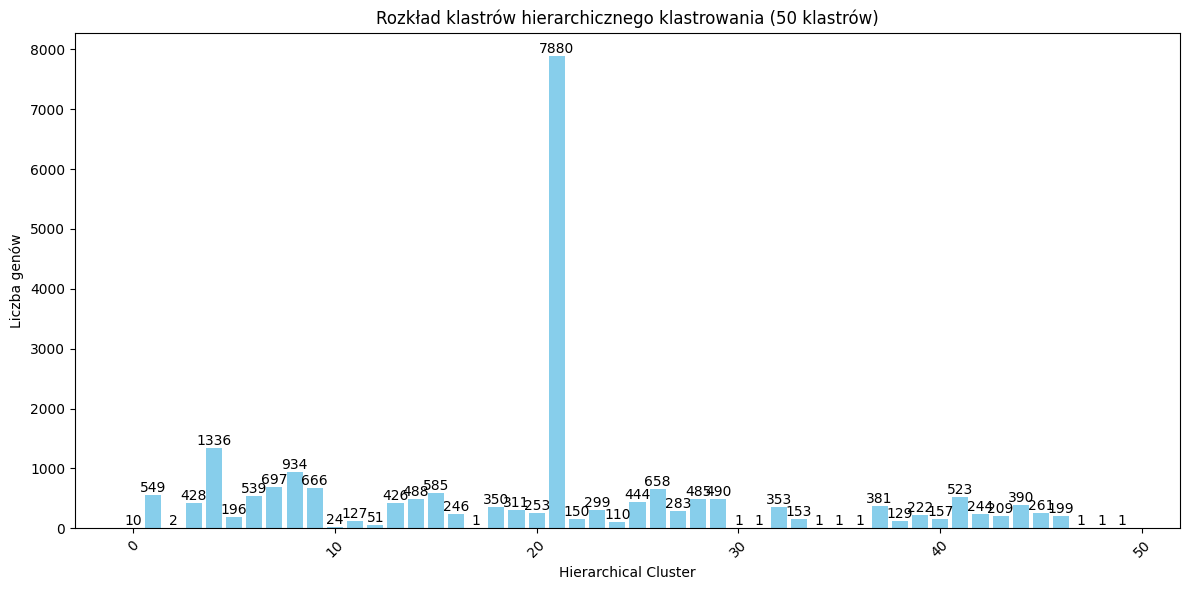

In [ ]:
import matplotlib.pyplot as plt


agg_cluster_counts_50 = df_filtered['Agg_Cluster_50'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
bars = plt.bar(agg_cluster_counts_50.index, agg_cluster_counts_50.values, color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.title('Rozkład klastrów hierarchicznego klastrowania (50 klastrów)')
plt.xlabel('Hierarchical Cluster')
plt.ylabel('Liczba genów')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
hierarchical_results = df_filtered[['Unnamed: 0', 'Agg_Cluster_50']].rename(columns={'Unnamed: 0': 'Gene'})
hierarchical_results.to_csv("hierarchical_clustering_results.csv", index=False)

print("Wyniki hierarchicznego klastrowania zapisane do pliku 'hierarchical_clustering_results.csv'.")

Wyniki hierarchicznego klastrowania zapisane do pliku 'hierarchical_clustering_results.csv'.


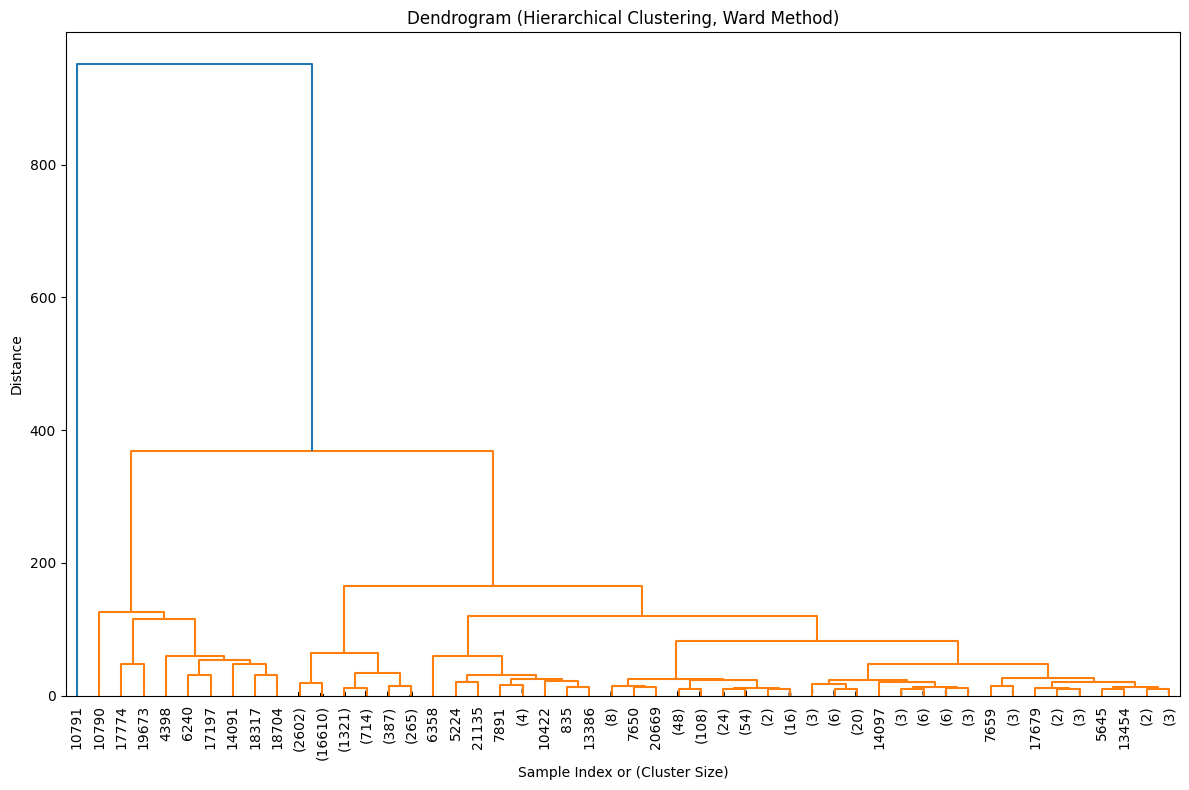

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(data_normalized, method='ward')

plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode='lastp', p=50, leaf_rotation=90., leaf_font_size=10., show_contracted=True)
plt.title("Dendrogram (Hierarchical Clustering, Ward Method)")
plt.xlabel("Sample Index or (Cluster Size)")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()




In [ ]:
from sklearn.cluster import DBSCAN

dbscan_clustering = DBSCAN(eps=0.5, min_samples=10)
dbscan_labels = dbscan_clustering.fit_predict(data_normalized)

df_filtered.loc[:, 'DBSCAN_Cluster'] = dbscan_labels

dbscan_cluster_counts = pd.Series(dbscan_labels).value_counts()
print(f"Ilość genów w każdym klastrze dla DBSCAN:")
print(dbscan_cluster_counts)

if len(set(dbscan_labels)) > 1 and -1 not in dbscan_labels:
    dbscan_silhouette_avg = silhouette_score(data_normalized, dbscan_labels)
    print(f"Średni wskaźnik Silhouette dla DBSCAN: {dbscan_silhouette_avg:.4f}")
else:
    print("Nie można obliczyć wskaźnika Silhouette dla DBSCAN (za mało klastrów lub obecność outlierów).")


Ilość genów w każdym klastrze dla DBSCAN:
 0      8089
-1      1529
 6       820
 34      679
 16      648
        ... 
 107      10
 114      10
 83       10
 113      10
 108       6
Name: count, Length: 117, dtype: int64
Nie można obliczyć wskaźnika Silhouette dla DBSCAN (za mało klastrów lub obecność outlierów).


<ipython-input-24-bbbb4f961d23>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'DBSCAN_Cluster'] = dbscan_labels


<ipython-input-25-ef5eb1800f49>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'PCA{i+1}'] = pca_result[:, i]
<ipython-input-25-ef5eb1800f49>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'PCA{i+1}'] = pca_result[:, i]
<ipython-input-25-ef5eb1800f49>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

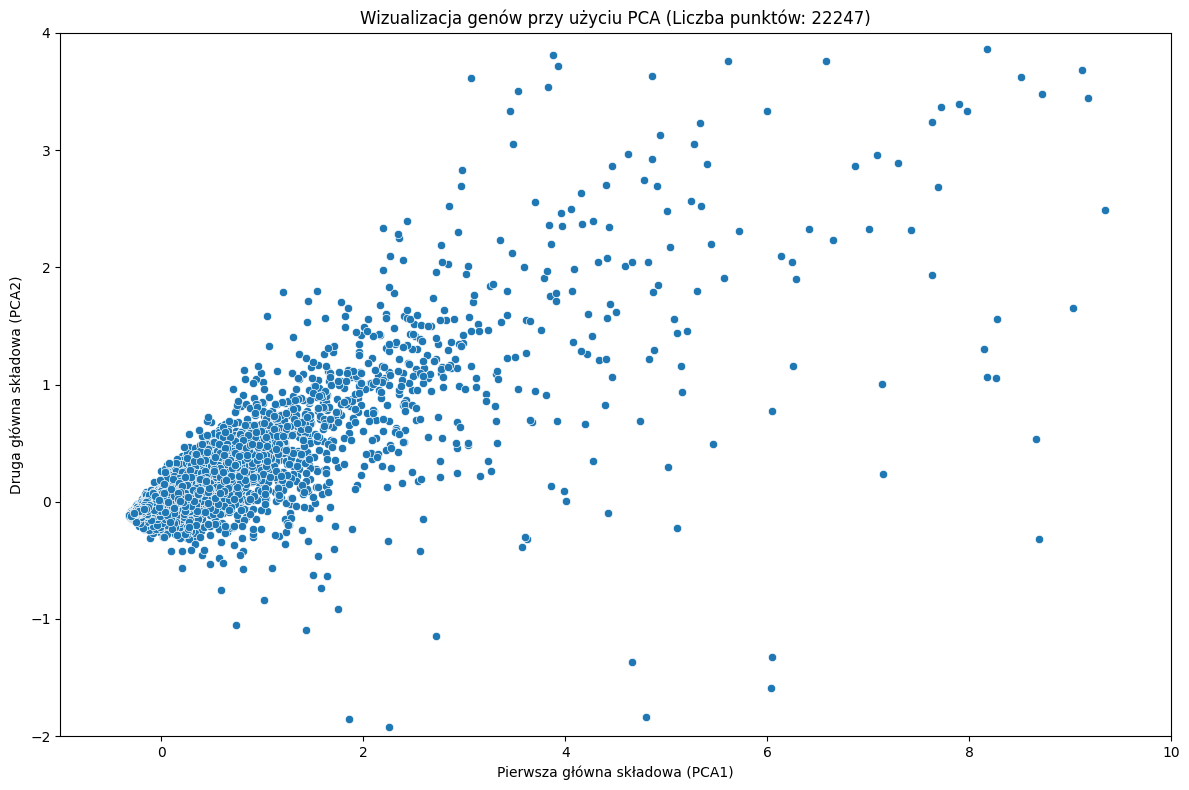

  Principal Component  Explained Variance Ratio
0                PCA1                  0.920489
1                PCA2                  0.060640
2                PCA3                  0.006992
3                PCA4                  0.003096
4                PCA5                  0.002205
5                PCA6                  0.001337
6                PCA7                  0.001137
7                PCA8                  0.000772
8                PCA9                  0.000544
9               PCA10                  0.000523
Całkowita wyjaśniona wariancja przez 10 głównych składowych: 99.77%
Liczba punktów na wykresie: 22247


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

data_values = df_filtered.loc[:, 'SRR7451446':'SRR7451472']
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_values)

pca = PCA(n_components=10)
pca_result = pca.fit_transform(data_normalized)


for i in range(10):
    df_filtered[f'PCA{i+1}'] = pca_result[:, i]

num_points = len(df_filtered)

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='PCA1', y='PCA2', data=df_filtered,
    #hue=f'Cluster_{n_clusters_40}', palette='viridis',
    legend=None
)


plt.xlim(-1, 10)
plt.ylim(-2, 4)

plt.title(f"Wizualizacja genów przy użyciu PCA (Liczba punktów: {num_points})")
plt.xlabel("Pierwsza główna składowa (PCA1)")
plt.ylabel("Druga główna składowa (PCA2)")
plt.tight_layout()
plt.show()

explained_variance = pd.DataFrame({
    'Principal Component': [f'PCA{i+1}' for i in range(10)],
    'Explained Variance Ratio': pca.explained_variance_ratio_
})
print(explained_variance)

total_explained_variance = sum(pca.explained_variance_ratio_)
print(f"Całkowita wyjaśniona wariancja przez 10 głównych składowych: {total_explained_variance:.2%}")
print(f"Liczba punktów na wykresie: {num_points}")


In [ ]:

kmeans_file_path = 'kmeans_40_clusters.csv'
wgcna_file_path = 'modules_and_genes.csv'


kmeans_data = pd.read_csv(kmeans_file_path)
wgcna_data = pd.read_csv(wgcna_file_path)


kmeans_data.rename(columns={'Unnamed: 0': 'Gene'}, inplace=True)
wgcna_data.rename(columns={'Gene': 'Gene'}, inplace=True)


merged_kmeans_wgcna = pd.merge(kmeans_data, wgcna_data, on='Gene')


print("Połączone dane (merged_kmeans_wgcna):")
print(merged_kmeans_wgcna.head())

kmeans_clusters = merged_kmeans_wgcna.groupby('Cluster_40')['Gene'].apply(set)
wgcna_clusters = merged_kmeans_wgcna.groupby('Module')['Gene'].apply(set)


kmeans_cluster_sizes = merged_kmeans_wgcna.groupby('Cluster_40')['Gene'].count()
wgcna_cluster_sizes = merged_kmeans_wgcna.groupby('Module')['Gene'].count()


overlap_matrix = pd.DataFrame(index=kmeans_clusters.index, columns=wgcna_clusters.index)

for kmeans_cluster, kmeans_genes in kmeans_clusters.items():
    for wgcna_cluster, wgcna_genes in wgcna_clusters.items():
        overlap_matrix.loc[kmeans_cluster, wgcna_cluster] = len(kmeans_genes & wgcna_genes)

overlap_matrix = overlap_matrix.fillna(0).infer_objects().astype(int)


best_matches = overlap_matrix.idxmax(axis=1)
max_overlap = overlap_matrix.max(axis=1)


best_matches_df = pd.DataFrame({
    'Cluster_40': best_matches.index,
    'K-means Cluster Size': best_matches.index.map(kmeans_cluster_sizes),
    'Best WGCNA Module': best_matches.values,
    'WGCNA Module Size': [wgcna_cluster_sizes[module] for module in best_matches.values],
    'Common Genes': max_overlap.values
})

best_matches_df = best_matches_df.sort_values(by='Common Genes', ascending=False)


print("\nNajlepsze dopasowanie dla każdego klastra K-means (posortowane malejąco):")
for _, row in best_matches_df.iterrows():
    print(f"K-means Cluster {row['Cluster_40']} ({row['K-means Cluster Size']} genów) "
          f"najlepiej dopasowany do WGCNA Module {row['Best WGCNA Module']} "
          f"({row['WGCNA Module Size']} genów) ({row['Common Genes']} wspólnych genów)")


from sklearn.metrics import adjusted_rand_score

ari_kmeans_wgcna = adjusted_rand_score(
    merged_kmeans_wgcna['Cluster_40'],
    merged_kmeans_wgcna['Module']
)
print(f"Adjusted Rand Index (ARI) między K-means a WGCNA: {ari_kmeans_wgcna:.4f}")


best_matches_df.to_csv("best_matches_kmeans_wgcna_with_sizes.csv", index=False)
print("\nWyniki zapisane do pliku 'best_matches_kmeans_wgcna_with_sizes.csv'.")


Połączone dane (merged_kmeans_wgcna):
      Gene  Cluster_40  Module
0      7SK           2       1
1      A2M          15      24
2  A2M-AS1           2       0
3    A2ML1           2       1
4   A4GALT          31       2

Najlepsze dopasowanie dla każdego klastra K-means (posortowane malejąco):
K-means Cluster 2 (8089 genów) najlepiej dopasowany do WGCNA Module 1 (7615 genów) (4515 wspólnych genów)
K-means Cluster 5 (1319 genów) najlepiej dopasowany do WGCNA Module 0 (8172 genów) (520 wspólnych genów)
K-means Cluster 39 (946 genów) najlepiej dopasowany do WGCNA Module 0 (8172 genów) (431 wspólnych genów)
K-means Cluster 13 (879 genów) najlepiej dopasowany do WGCNA Module 0 (8172 genów) (357 wspólnych genów)
K-means Cluster 29 (895 genów) najlepiej dopasowany do WGCNA Module 0 (8172 genów) (281 wspólnych genów)
K-means Cluster 0 (665 genów) najlepiej dopasowany do WGCNA Module 0 (8172 genów) (270 wspólnych genów)
K-means Cluster 16 (767 genów) najlepiej dopasowany do WGCNA Module 0 (

<ipython-input-32-0d935c8038fa>:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  overlap_matrix = overlap_matrix.fillna(0).infer_objects().astype(int)


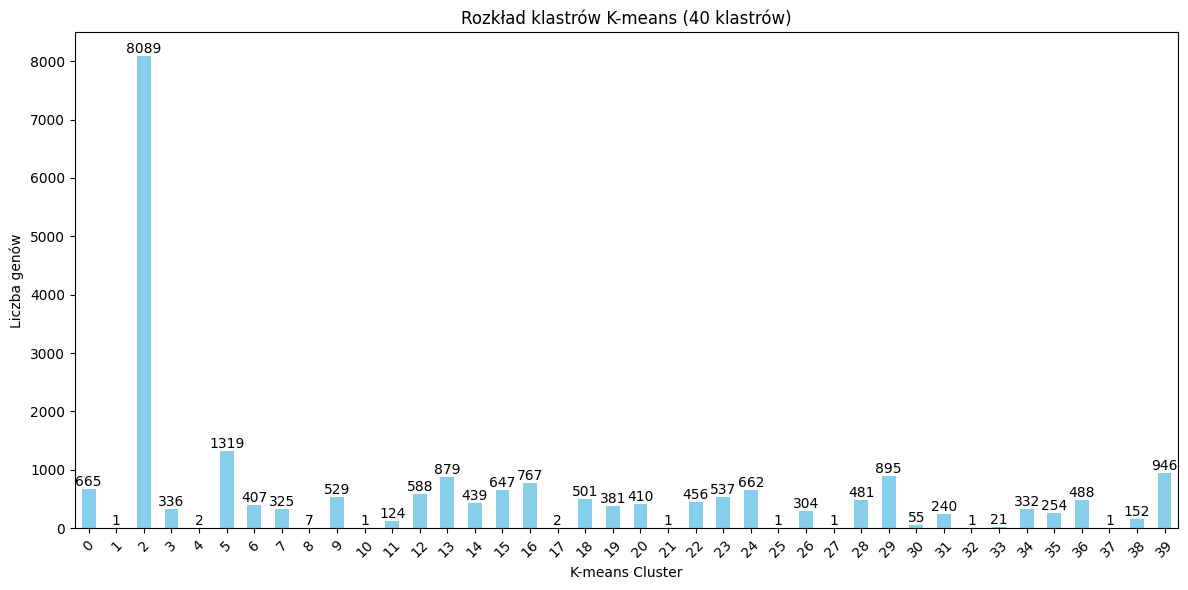

In [ ]:
import matplotlib.pyplot as plt

kmeans_cluster_counts = merged_kmeans_wgcna['Cluster_40'].value_counts()

plt.figure(figsize=(12, 6))
bars = kmeans_cluster_counts.sort_index().plot(kind='bar', color='skyblue')


for bar in bars.containers:
    bars.bar_label(bar, fmt='%d', label_type='edge', fontsize=10)

plt.title('Rozkład klastrów K-means (40 klastrów)')
plt.xlabel('K-means Cluster')
plt.ylabel('Liczba genów')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


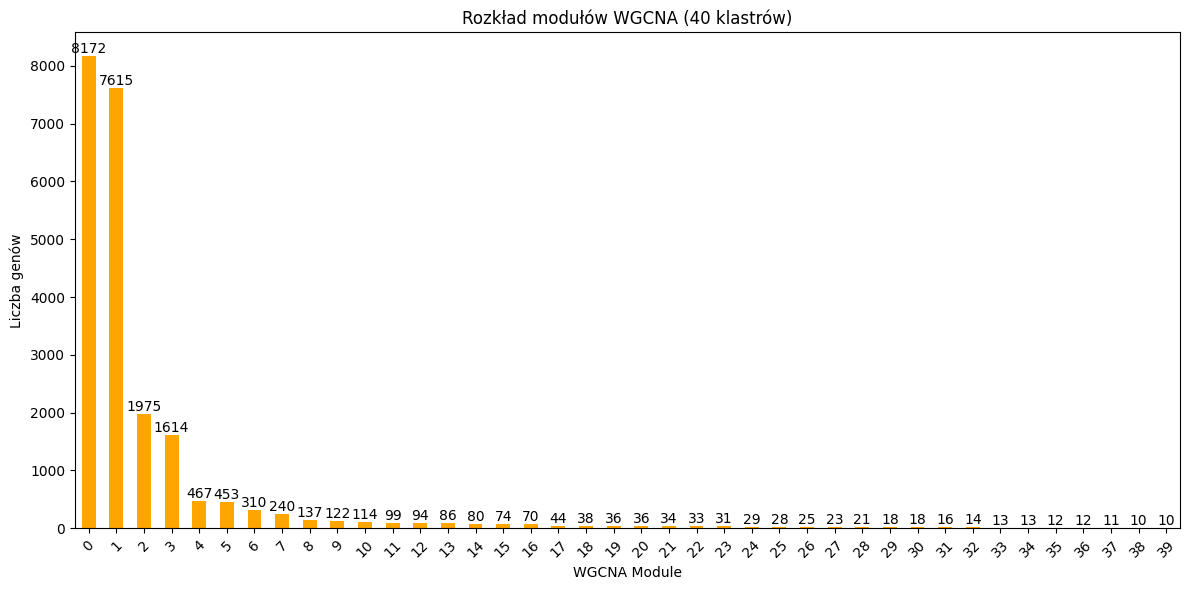

In [ ]:

wgcna_module_counts = merged_kmeans_wgcna['Module'].value_counts()


plt.figure(figsize=(12, 6))
bars = wgcna_module_counts.sort_index().plot(kind='bar', color='orange')


for bar in bars.containers:
    bars.bar_label(bar, fmt='%d', label_type='edge', fontsize=10)

plt.title('Rozkład modułów WGCNA (40 klastrów)')
plt.xlabel('WGCNA Module')
plt.ylabel('Liczba genów')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


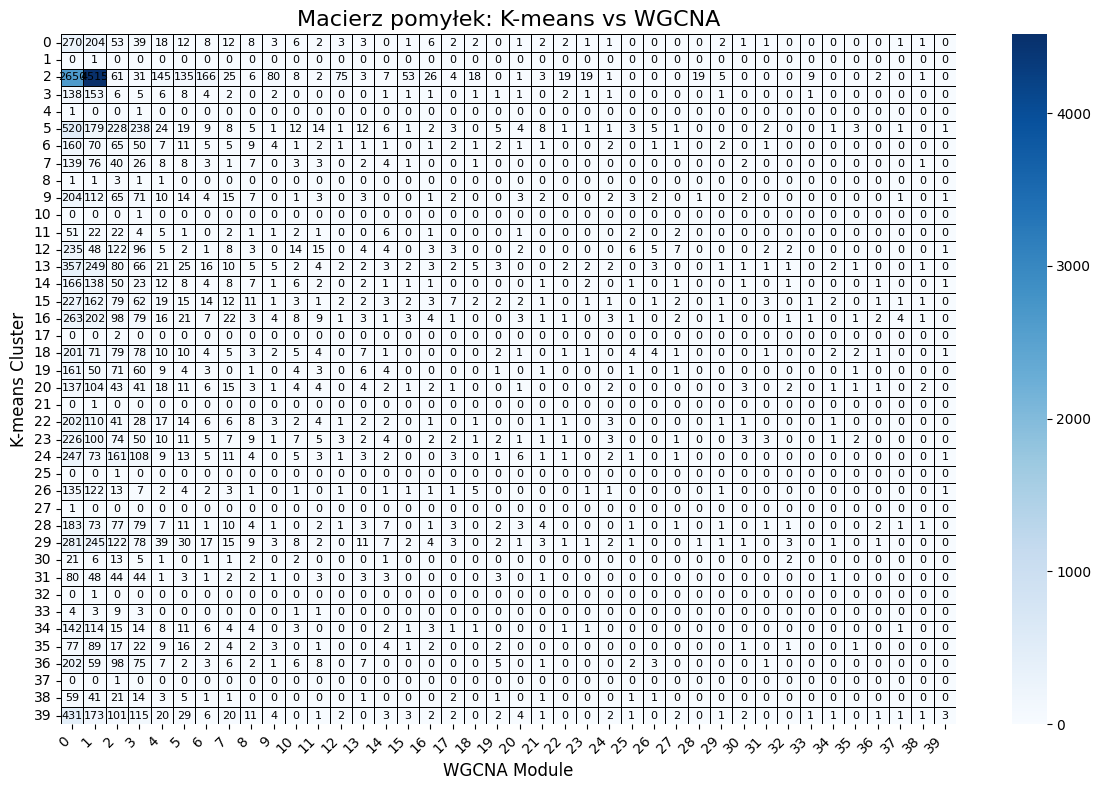

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


conf_matrix = confusion_matrix(merged_kmeans_wgcna['Cluster_40'], merged_kmeans_wgcna['Module'])


plt.figure(figsize=(12, 8))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=True,
    annot_kws={"size": 8, "color": "black"},
    linecolor='black',
    linewidths=0.5
)
plt.title('Macierz pomyłek: K-means vs WGCNA', fontsize=16)
plt.xlabel('WGCNA Module', fontsize=12)
plt.ylabel('K-means Cluster', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


In [ ]:

conf_matrix_df = pd.DataFrame(
    conf_matrix,
    index=merged_kmeans_wgcna['Cluster_40'].unique(),
    columns=merged_kmeans_wgcna['Module'].unique()
)

conf_matrix_df = conf_matrix_df.sort_index(axis=0).sort_index(axis=1)


conf_matrix_df.to_csv('confusion_matrix_kmeans_vs_wgcna.csv', index_label='Cluster_40')

print("Macierz pomyłek została zapisana do pliku 'confusion_matrix_kmeans_vs_wgcna.csv'.")


Macierz pomyłek została zapisana do pliku 'confusion_matrix_kmeans_vs_wgcna.csv'.


In [ ]:

total_genes = len(merged_kmeans_wgcna)
print(f"Łączna liczba genów biorących udział w porównaniu: {total_genes}")


same_cluster_genes = merged_kmeans_wgcna[merged_kmeans_wgcna['Cluster_40'] == merged_kmeans_wgcna['Module']]
num_same_cluster_genes = len(same_cluster_genes)
print(f"Liczba genów przypisanych do tych samych klastrów w obu metodach: {num_same_cluster_genes}")


same_cluster_genes.to_csv('same_cluster_genes.csv', index=False)
print("Lista genów przypisanych do tych samych klastrów zapisana do pliku 'same_cluster_genes.csv'.")

different_cluster_genes = merged_kmeans_wgcna[merged_kmeans_wgcna['Cluster_40'] != merged_kmeans_wgcna['Module']]
num_different_cluster_genes = len(different_cluster_genes)
print(f"Liczba genów przypisanych do różnych klastrów w obu metodach: {num_different_cluster_genes}")

different_cluster_genes.to_csv('different_cluster_genes.csv', index=False)
print("Lista genów przypisanych do różnych klastrów zapisana do pliku 'different_cluster_genes.csv'.")

common_genes_count = best_matches_df['Common Genes'].sum()
print(f"Liczba wspólnych genów między najlepszymi dopasowanymi klastrami: {common_genes_count}")


Łączna liczba genów biorących udział w porównaniu: 22247
Liczba genów przypisanych do tych samych klastrów w obu metodach: 382
Lista genów przypisanych do tych samych klastrów zapisana do pliku 'same_cluster_genes.csv'.
Liczba genów przypisanych do różnych klastrów w obu metodach: 21865
Lista genów przypisanych do różnych klastrów zapisana do pliku 'different_cluster_genes.csv'.
Liczba wspólnych genów między najlepszymi dopasowanymi klastrami: 19925


In [76]:
def generate_cluster_report(df, kmeans_col, wgcna_col, min_common_genes=5, top_n=None):
    """
    Generuje raport pokazujący współdzielenie genów między klastrami K-means a modułami WGCNA,
    bez pomijania największych klastrów i modułów.

    Args:
        df (pd.DataFrame): DataFrame z przypisaniami genów.
        kmeans_col (str): Kolumna z numerami klastrów K-means.
        wgcna_col (str): Kolumna z numerami modułów WGCNA.
        min_common_genes (int): Minimalna liczba wspólnych genów do uwzględnienia w raporcie.
        top_n (int): Liczba najwyższych wyników do wyświetlenia dla każdego klastra K-means.

    Returns:
        List[str]: Lista opisowych raportów w formie tekstowej.
    """
    reports = []

    for kmeans_cluster in df[kmeans_col].unique():
        kmeans_genes = set(df[df[kmeans_col] == kmeans_cluster]['Gene'])
        matches = []

        for wgcna_module in df[wgcna_col].unique():
            wgcna_genes = set(df[df[wgcna_col] == wgcna_module]['Gene'])
            common_genes = kmeans_genes & wgcna_genes

            if len(common_genes) >= min_common_genes:
                matches.append({
                    'K-means Cluster': kmeans_cluster,
                    'WGCNA Module': wgcna_module,
                    'Common Genes Count': len(common_genes),
                    'Total Genes in K-means Cluster': len(kmeans_genes),
                })

        sorted_matches = sorted(matches, key=lambda x: x['Common Genes Count'], reverse=True)
        if top_n:
            sorted_matches = sorted_matches[:top_n]

        for match in sorted_matches:
            report = (
                f"Klaster {match['K-means Cluster']} w K-means ma {match['Total Genes in K-means Cluster']} genów, "
                f"z czego {match['Common Genes Count']} genów współdzieli z modułem {match['WGCNA Module']} w WGCNA."
            )
            reports.append(report)

    return reports



cluster_reports = generate_cluster_report(merged_kmeans_wgcna, 'Cluster_40', 'Module', min_common_genes=5, top_n=5)

print("\nRaport wszystkich klastrów:")
for i, report in enumerate(cluster_reports[:10], 1):
    print(f"{i}. {report}")


with open("cluster_reports.txt", "w") as f:
    for report in cluster_reports:
        f.write(report + "\n")
print("\nRaport zapisany do pliku 'cluster_reports.txt'.")



Raport wszystkich klastrów:
1. Klaster 2 w K-means ma 8089 genów, z czego 4515 genów współdzieli z modułem 1 w WGCNA.
2. Klaster 2 w K-means ma 8089 genów, z czego 2650 genów współdzieli z modułem 0 w WGCNA.
3. Klaster 2 w K-means ma 8089 genów, z czego 166 genów współdzieli z modułem 6 w WGCNA.
4. Klaster 2 w K-means ma 8089 genów, z czego 145 genów współdzieli z modułem 4 w WGCNA.
5. Klaster 2 w K-means ma 8089 genów, z czego 135 genów współdzieli z modułem 5 w WGCNA.
6. Klaster 15 w K-means ma 647 genów, z czego 227 genów współdzieli z modułem 0 w WGCNA.
7. Klaster 15 w K-means ma 647 genów, z czego 162 genów współdzieli z modułem 1 w WGCNA.
8. Klaster 15 w K-means ma 647 genów, z czego 79 genów współdzieli z modułem 2 w WGCNA.
9. Klaster 15 w K-means ma 647 genów, z czego 62 genów współdzieli z modułem 3 w WGCNA.
10. Klaster 15 w K-means ma 647 genów, z czego 19 genów współdzieli z modułem 4 w WGCNA.

Raport zapisany do pliku 'cluster_reports.txt'.



Najlepsze dopasowanie dla każdego klastra K-means (posortowane malejąco):
K-means Cluster 2 (8089 genów) najlepiej dopasowany do WGCNA Module 21 (7880 genów) (7880 wspólnych genów)
K-means Cluster 5 (1319 genów) najlepiej dopasowany do WGCNA Module 4 (1336 genów) (1319 wspólnych genów)
K-means Cluster 39 (946 genów) najlepiej dopasowany do WGCNA Module 8 (934 genów) (934 wspólnych genów)
K-means Cluster 24 (662 genów) najlepiej dopasowany do WGCNA Module 26 (658 genów) (658 wspólnych genów)
K-means Cluster 16 (767 genów) najlepiej dopasowany do WGCNA Module 7 (697 genów) (656 wspólnych genów)
K-means Cluster 0 (665 genów) najlepiej dopasowany do WGCNA Module 9 (666 genów) (646 wspólnych genów)
K-means Cluster 29 (895 genów) najlepiej dopasowany do WGCNA Module 15 (585 genów) (553 wspólnych genów)
K-means Cluster 23 (537 genów) najlepiej dopasowany do WGCNA Module 6 (539 genów) (537 wspólnych genów)
K-means Cluster 9 (529 genów) najlepiej dopasowany do WGCNA Module 1 (549 genów) (497 w

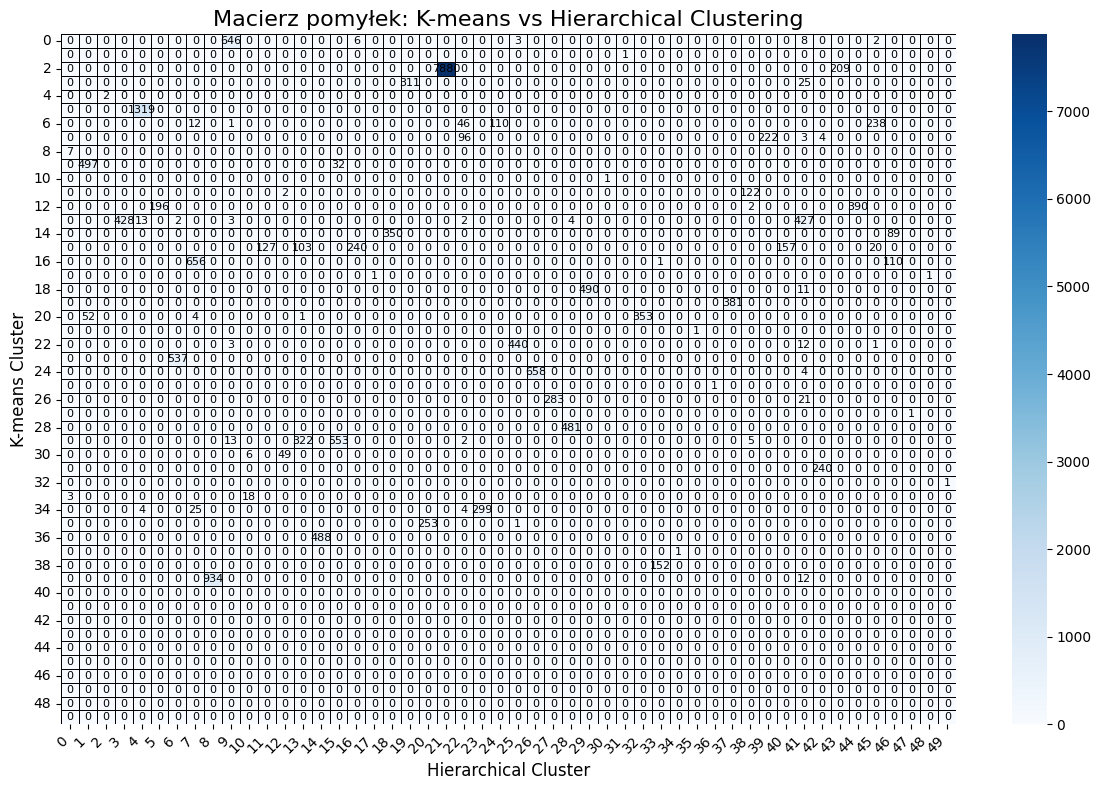


Adjusted Rand Index (ARI): 0.9551724099205329


In [81]:

import pandas as pd
from sklearn.metrics import confusion_matrix, adjusted_rand_score
import seaborn as sns
import matplotlib.pyplot as plt

kmeans_file_path = "kmeans_40_clusters.csv"
hierarchical_file_path = "hierarchical_clustering_results.csv"
kmeans_data = pd.read_csv(kmeans_file_path)
hierarchical_data = pd.read_csv(hierarchical_file_path)
kmeans_data.rename(columns={'Unnamed: 0': 'Gene'}, inplace=True)


merged_kmeans_hierarchical = pd.merge(kmeans_data, hierarchical_data, on='Gene')

def compare_and_report_clusters(df, kmeans_col, hierarchical_col, min_common_genes=5, top_n=None):

    kmeans_clusters = df.groupby(kmeans_col)['Gene'].apply(set)
    hierarchical_clusters = df.groupby(hierarchical_col)['Gene'].apply(set)

    best_matches = []
    reports = []

    for kmeans_cluster, kmeans_genes in kmeans_clusters.items():
        best_match = None
        max_overlap = 0
        best_hierarchical_genes = set()
        matches = []

        for hierarchical_cluster, hierarchical_genes in hierarchical_clusters.items():
            overlap = len(kmeans_genes & hierarchical_genes)
            if overlap > max_overlap:
                max_overlap = overlap
                best_match = hierarchical_cluster
                best_hierarchical_genes = hierarchical_genes


            if overlap >= min_common_genes:
                matches.append({
                    'K-means Cluster': kmeans_cluster,
                    'WGCNA Module': hierarchical_cluster,
                    'Common Genes Count': overlap,
                    'Total Genes in K-means Cluster': len(kmeans_genes),
                })

        best_matches.append({
            'K-means Cluster': kmeans_cluster,
            'K-means Genes': len(kmeans_genes),
            'Best Hierarchical Cluster': best_match,
            'Hierarchical Genes': len(best_hierarchical_genes),
            'Common Genes': max_overlap
        })


        sorted_matches = sorted(matches, key=lambda x: x['Common Genes Count'], reverse=True)
        if top_n:
            sorted_matches = sorted_matches[:top_n]

        for match in sorted_matches:
            report = (
                f"Klaster {match['K-means Cluster']} w K-means ma {match['Total Genes in K-means Cluster']} genów, "
                f"z czego {match['Common Genes Count']} genów współdzieli z modułem {match['WGCNA Module']} w WGCNA."
            )
            reports.append(report)


    print("\nNajlepsze dopasowanie dla każdego klastra K-means (posortowane malejąco):")
    best_matches = sorted(best_matches, key=lambda x: x['Common Genes'], reverse=True)
    for match in best_matches:
        print(
            f"K-means Cluster {match['K-means Cluster']} ({match['K-means Genes']} genów) "
            f"najlepiej dopasowany do WGCNA Module {match['Best Hierarchical Cluster']} "
            f"({match['Hierarchical Genes']} genów) ({match['Common Genes']} wspólnych genów)"
        )


    with open("cluster_reports.txt", "w") as f:
        for report in reports:
            f.write(report + "\n")
    print("\nRaport zapisany do pliku 'cluster_reports.txt'.")


    conf_matrix = confusion_matrix(df[kmeans_col], df[hierarchical_col])

    plt.figure(figsize=(12, 8))
    sns.heatmap(
        conf_matrix,
        annot=True,
        fmt='d',
        cmap='Blues',
        cbar=True,
        annot_kws={"size": 8, "color": "black"},
        linecolor='black',
        linewidths=0.5
    )
    plt.title('Macierz pomyłek: K-means vs Hierarchical Clustering', fontsize=16)
    plt.xlabel('Hierarchical Cluster', fontsize=12)
    plt.ylabel('K-means Cluster', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.tight_layout()
    plt.show()


    ari = adjusted_rand_score(df[kmeans_col], df[hierarchical_col])
    print(f"\nAdjusted Rand Index (ARI): {ari}")

    return best_matches, reports, conf_matrix, ari


best_matches, reports, conf_matrix, ari = compare_and_report_clusters(
    merged_kmeans_hierarchical, 'Cluster_40', 'Agg_Cluster_50', min_common_genes=5, top_n=5
)



Raport szczegółowy dopasowań modułów WGCNA do klastrów hierarchicznych:
1. Moduł 1 w WGCNA ma 7615 genów, z czego 4409 genów współdzieli z klastrem 21 w hierarchicznym klastrowaniu.
2. Moduł 1 w WGCNA ma 7615 genów, z czego 202 genów współdzieli z klastrem 9 w hierarchicznym klastrowaniu.
3. Moduł 1 w WGCNA ma 7615 genów, z czego 192 genów współdzieli z klastrem 41 w hierarchicznym klastrowaniu.
4. Moduł 1 w WGCNA ma 7615 genów, z czego 181 genów współdzieli z klastrem 4 w hierarchicznym klastrowaniu.
5. Moduł 1 w WGCNA ma 7615 genów, z czego 174 genów współdzieli z klastrem 7 w hierarchicznym klastrowaniu.
6. Moduł 0 w WGCNA ma 8172 genów, z czego 2574 genów współdzieli z klastrem 21 w hierarchicznym klastrowaniu.
7. Moduł 0 w WGCNA ma 8172 genów, z czego 531 genów współdzieli z klastrem 4 w hierarchicznym klastrowaniu.
8. Moduł 0 w WGCNA ma 8172 genów, z czego 423 genów współdzieli z klastrem 8 w hierarchicznym klastrowaniu.
9. Moduł 0 w WGCNA ma 8172 genów, z czego 271 genów współd

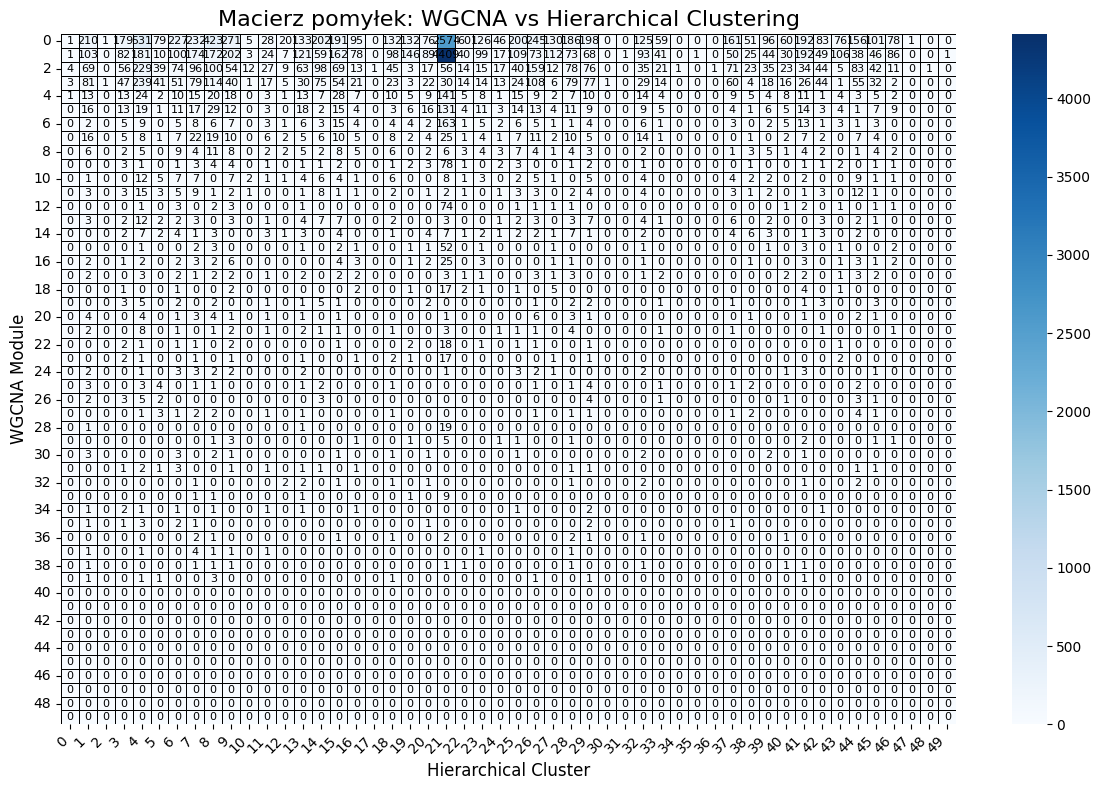


Adjusted Rand Index (ARI): 0.1145


In [84]:
import pandas as pd
from sklearn.metrics import confusion_matrix, adjusted_rand_score
import seaborn as sns
import matplotlib.pyplot as plt

wgcna_file_path = 'modules_and_genes.csv'
hierarchical_file_path = 'hierarchical_clustering_results.csv'
wgcna_data = pd.read_csv(wgcna_file_path)
hierarchical_data = pd.read_csv(hierarchical_file_path)


hierarchical_data.rename(columns={'Unnamed: 0': 'Gene'}, inplace=True)


merged_wgcna_hierarchical = pd.merge(wgcna_data, hierarchical_data, on='Gene')


def generate_cluster_report(df, wgcna_col, hierarchical_col, min_common_genes=5, top_n=None):
    """
    Generuje raport współdzielenia genów między modułami WGCNA a klastrami hierarchicznymi.

    Args:
        df (pd.DataFrame): Połączony DataFrame z przypisaniami genów.
        wgcna_col (str): Kolumna z numerami modułów WGCNA.
        hierarchical_col (str): Kolumna z numerami klastrów hierarchicznych.
        min_common_genes (int): Minimalna liczba wspólnych genów do uwzględnienia w raporcie.
        top_n (int): Liczba najwyższych wyników do wyświetlenia dla każdego modułu WGCNA.

    Returns:
        List[str]: Lista raportów tekstowych.
    """
    reports = []

    for wgcna_module in df[wgcna_col].unique():
        wgcna_genes = set(df[df[wgcna_col] == wgcna_module]['Gene'])
        matches = []

        for hierarchical_cluster in df[hierarchical_col].unique():
            hierarchical_genes = set(df[df[hierarchical_col] == hierarchical_cluster]['Gene'])
            common_genes = wgcna_genes & hierarchical_genes

            if len(common_genes) >= min_common_genes:
                matches.append({
                    'WGCNA Module': wgcna_module,
                    'Hierarchical Cluster': hierarchical_cluster,
                    'Common Genes Count': len(common_genes),
                    'Total Genes in WGCNA Module': len(wgcna_genes),
                })

        sorted_matches = sorted(matches, key=lambda x: x['Common Genes Count'], reverse=True)
        if top_n:
            sorted_matches = sorted_matches[:top_n]

        for match in sorted_matches:
            report = (
                f"Moduł {match['WGCNA Module']} w WGCNA ma {match['Total Genes in WGCNA Module']} genów, "
                f"z czego {match['Common Genes Count']} genów współdzieli z klastrem {match['Hierarchical Cluster']} w hierarchicznym klastrowaniu."
            )
            reports.append(report)

    return reports

cluster_reports = generate_cluster_report(merged_wgcna_hierarchical, 'Module', 'Agg_Cluster_50', min_common_genes=5, top_n=5)

print("\nRaport szczegółowy dopasowań modułów WGCNA do klastrów hierarchicznych:")
for i, report in enumerate(cluster_reports[:10], 1):
    print(f"{i}. {report}")

with open("wgcna_hierarchical_cluster_reports.txt", "w") as f:
    for report in cluster_reports:
        f.write(report + "\n")
print("\nRaport zapisany do pliku 'wgcna_hierarchical_cluster_reports.txt'.")

conf_matrix = confusion_matrix(merged_wgcna_hierarchical['Module'], merged_wgcna_hierarchical['Agg_Cluster_50'])

plt.figure(figsize=(12, 8))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=True,
    annot_kws={"size": 8, "color": "black"},
    linecolor='black',
    linewidths=0.5
)
plt.title('Macierz pomyłek: WGCNA vs Hierarchical Clustering', fontsize=16)
plt.xlabel('Hierarchical Cluster', fontsize=12)
plt.ylabel('WGCNA Module', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


ari_wgcna_hierarchical = adjusted_rand_score(
    merged_wgcna_hierarchical['Module'],
    merged_wgcna_hierarchical['Agg_Cluster_50']
)
print(f"\nAdjusted Rand Index (ARI): {ari_wgcna_hierarchical:.4f}")
